# ACCREDIAN TELECOM - Group 1007

# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Identify and fill in NULL value columns**](#Section5)<br>
     5.1 [**Events_Data**](#Section5.1)<br>
     5.1.1 [**Fill in NULL state values**](#Section5.1.1)<br>
     5.1.2 [**Fill in NULL device_id**](#Section5.1.3)<br>
     5.1.3 [**Fill in NULL longitude and Latitude**](#Section5.1.4)<br>
     5.2 [**Gender_age_train_data**](#Section5.2)<br>
     5.2.1 [**Redefine age group**](#Section5.2.1)<br>
     5.3 [**Phone_brand_model_data**](#Section5.3)<br>
     5.3.1 [**Convert Mobile Brand name to English**](#Section5.3.1)<br>
     5.3.2 [**Convert Mobile Model name to English**](#Section5.3.2)<br>
6. [**Data Cleaning - Correcting Inconsistent dada**](#Section6)<br>
     6.1 [**Events data - The city name is given as area name**](#Section6.1)<br>
     6.1 [**Events data - longitude and latitude out of range**](#Section6.2)<br>
     6.2 [**Events data - Incoorect Timestamp data type**](#Section6.3)<br>
     6.3 [**Selection of Data for 6 States**](#Section6.4)<br>
7. [**Folium Mapping / Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
     8.1 [**Distribution of users across state**](#Section8.1)<br>
     8.2 [**Distribution of users across phone brands**](#Section8.2)<br>
     8.3 [**Distribution of users across gender**](#Section8.3)<br>
     8.4 [**Distribution of users across age segments**](#Section8.4)<br>
     8.5 [**Distribution of users across phone brands**](#Section8.5)<br>
     8.6 [**Distribution of gender for each state, age segment and phone brand**](#Section8.6)<br>
     8.7 [**Distribution of age segment for each state, gender and phone brand**](#Section8.7)<br>
     8.8 [**Hourly distribution of phone calls**](#Section8.8)<br>
     8.9 [**Plot the users on map using suitable package**](#Section8.9)<br>
     8.10[**Distribution of User Type**](#Section8.9)<br>
9. [**Summarization**](#Section9)</br>

---
<a name = Section1></a>
# **1. Introduction**
---

AccredianTelecom, one of the leading telecom players, understands that customizing offerings is very important for its business to stay competitive.
Currently, AccredianTelecom is seeking to leverage behavioural data from more than 60% of the 50 million mobile devices active daily in India
They are doing this to help their clients better understand and interact with their audiences.


---
<a name = Section2></a>
# **2. Problem Statement**
In this consulting assignment, Accredianians are expected to build a dashboard.
This dashboard will help us to understand a user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties
Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts.
These efforts are relevant to their users and cater to their preferences.

To help the customer the consultants are expected to have depth of clarity in the underlying data.
How much effort has been put into cleansing and purifying the data will decide how closely have you looked at the data..
How detailed is the observation stated in the submission report and finally, how well a group presents their consulting journey.
Please remember that this is an analytics consulting firm. Hence, your efforts in terms of finding user behaviour are going to directly impact the company's offerings.
Do help the company understand what is the right way forward and suggest actionable insights from marketing and product terms.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**

---
<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
# Package that is required for translation
!pip install googletrans==3.1.0a0
!pip install mysql.connector

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=2044e7fa942caf496f6dd22d6ec7e260ce92f6d42ddc6673f4b5b006f3b49216
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

---
<a name = Section32></a>
### **3.2 Upgrading Libraries**

---
<a name=Section33></a>
## *3.3 Importing Libraries*

In [2]:
#Import gender_age_train dataset
import mysql.connector as connection
import pandas as pd
import numpy as np
import warnings
# Warnings will appear only once
warnings.filterwarnings("ignore")
from googletrans import Translator

In [3]:
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborm library for interactive visualization

from plotly import graph_objs as go                                 # Contains an auto-generated hierarchy of Python classes
from plotly.offline import iplot                                    # Display Figures in offline mode
#-------------------------------------------------------------------------------------------------------------------------------
from ipywidgets import interact                                     # Creates UI controls for exploring code and data
import warnings                                                     # Importing warning to disable runtime warnings

import folium

In [4]:
from matplotlib import rc
rc('font',**{ 'family': 'Times New Roman'})

---
<a name = Section4></a>
## *4. Data Acquisition and Description*
---

- There are three datasets provided for the project Analysis
- Events_data - Received as .csv file and contain call data

|Id|Feature|Description|
|:--|:--|:--|
|01| event_id               | A numeric value uniquely identifying the call |
|02| device_id              | Device Id used by caller|
|03| timestamp              | Time of the call|
|04| longitude              | Longitude|
|05| latitude               | Latitude|


- Gender Age Train dataset - A MySQL dataset contain Caller details
|Id|Feature|Description|
|:--|:--|:--|
|01| device_id               | A numeric value uniquely identifying the call |
|02| gender                  | Device Id used by caller|
|03| age                     | Time of the call|
|04| age_group               | Longitude|
|05| latitude                | Latitude|


- Phone brand mode dataset - A MySQL dataset containing device details
|Id|Feature|Description|
|:--|:--|:--|
|01| device_id               | A numeric value uniquely identifying the call |
|02| phone_brand             | Unique Device Id|
|03| device_model            | Unique Device model|


In [5]:
try:
    mydb = connection.connect(host="cpanel.insaid.co", database = 'Capstone1',user="student", passwd="student",use_pure=True)


    #Get gender_age_train
    query_gender_age_train = "Select * from gender_age_train;"
    pd_gender_age_train = pd.read_sql(query_gender_age_train,mydb)

    #Get phone_brand_device_model
    query_phone_brand_model = "Select * from phone_brand_device_model;"
    pd_phone_brand_model = pd.read_sql(query_phone_brand_model,mydb)


    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [6]:
pd_events_data = pd.read_csv(r"https://media.githubusercontent.com/media/testanalyst82/Accredian_Files/main/events_data.csv")

In [7]:
# Looking events_data
#pd_events_data = pd.read_csv(r'D:\RUPALI\INSAID\CapstoneProject\events_data.csv')

In [8]:
#pd_events_data = pd.read_csv(r'C:\Users\Chethan A\Desktop\CapstoneProjectRelated\events_data.csv')

Understanding the Basic Details of All the Data

In [9]:
print('Data Shape of Events Data - ', pd_events_data.shape)

Data Shape of Events Data -  (3252950, 7)


In [10]:
pd_events_data.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [11]:
pd_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [12]:
print('Data Shape of Gender Age Train - ', pd_gender_age_train.shape)

Data Shape of Gender Age Train -  (74645, 4)


In [13]:
pd_gender_age_train.head(5)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [14]:
pd_gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [15]:
print('Data Shape of PhoneBrandModel - ',pd_phone_brand_model.shape )

Data Shape of PhoneBrandModel -  (87726, 3)


In [16]:
pd_phone_brand_model.tail(5)

,device_id,phone_brand,device_model
87721,-4961458925928574032,华为,荣耀畅玩4X
87722,-8819817317449262375,华为,荣耀6
87723,-3358291377416935026,华为,荣耀畅玩4
87724,3282788959750981633,小米,MI 2
87725,2491639413207286271,酷比,M1


In [17]:
pd_phone_brand_model.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


---
<a name = Section5></a>
# **5. Identify and fill in NULL value columns**

---
<a name = Section5.1></a>
## **5.1 Events Data**

In [18]:
null_events_data = pd.DataFrame()
null_events_data['Null Frequency'] = pd_events_data.isna().sum()
null_events_data

,Null Frequency
event_id,0
device_id,453
timestamp,0
longitude,423
latitude,423
city,0
state,377


In [19]:
null_events_data['Missing Percentage'] = (pd_events_data.isna().sum()/pd_events_data.shape[0])*100
null_events_data.drop(['Missing Percentage'],axis=1)
null_events_data

,Null Frequency,Missing Percentage
event_id,0,0.000000
device_id,453,0.013926
timestamp,0,0.000000
longitude,423,0.013004
latitude,423,0.013004
city,0,0.000000
state,377,0.011589


#Observations:
- Missing device Id for 453 records
- Missing state for 377 records
- Missing longitude and latitue for 423 records


---
<a name = Section5.1.1></a>
## **5.1.1 Fill in NULL  data in states column**

In [20]:
def fillstatebydeviceid(deviceidby_state):
    for i in deviceidby_state:
        #print(i)
        state = pd_events_data[~pd_events_data.state.isna() == True][pd_events_data.device_id== i]['state'].unique()
        pd_events_data['state'][(pd_events_data['device_id'] == i) & (pd_events_data['state'].isna() == True )] = state[0]

In [21]:
deviceidby_state= pd_events_data[pd_events_data.state.isna() == True]['device_id'].unique()
fillstatebydeviceid(deviceidby_state)

In [22]:
pd_events_data.isna().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

---
<a name = Section5.1.2></a>
# 5.1.2 Filter event data only for given states**

In [23]:
# Note : If you are executing this code here. You are first reducing the list and then taking action. If not. Execute it after cleanups of entire data (Section 6.5)

---
<a name = Section5.1.3></a>
# **5.1.2 Fill in NULL device_id**

In [24]:
#This function iterates through the list of cities of missing state and coreesponding state from non missing state records..
def filldevice(dev_events):
    for i in dev_events:
        #print(i)

        Lt = float(pd_events_data[pd_events_data.event_id == i].latitude.mode())
        Lg = float(pd_events_data[pd_events_data.event_id == i].longitude.mode())

        device = pd_events_data[(~pd_events_data.device_id.isna() == True) & (pd_events_data["latitude"] == Lt) & (pd_events_data["longitude"] == Lg)].device_id.mode()

        pd_events_data['device_id'][(pd_events_data['event_id'] == i) & (pd_events_data['device_id'].isna() == True )] = device[0]
        #print(i,"\t")
        #print('unique_device_id =',device[0])


In [25]:
#Populate the device_id
device_arr= pd_events_data[pd_events_data.device_id.isna() == True]['event_id'].unique()
#fillstate(device_arr)
#print(device_arr)
filldevice(device_arr)

In [26]:
pd_events_data.isna().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

---
<a name = Section5.1.4></a>
# **5.1.3 Fill in NULL longitude and latitude**

In [27]:
def filllat(lat_events):
    for i in lat_events:
        #print(i)

        D =  int(pd_events_data[pd_events_data.event_id == i].device_id.mode())

        LT = pd_events_data[(~pd_events_data.latitude.isna() == True)  & (pd_events_data["device_id"] == D) ].latitude.mode()
        LG = pd_events_data[(~pd_events_data.longitude.isna() == True) & (pd_events_data["device_id"] == D) ].longitude.mode()

        pd_events_data['latitude'][(pd_events_data['event_id'] == i) & (pd_events_data['latitude'].isna() == True )] = LT[0]
        pd_events_data['longitude'][(pd_events_data['event_id'] == i) & (pd_events_data['longitude'].isna() == True )] = LG[0]
        #print(i,"\t")


In [28]:
lat_arr= pd_events_data[pd_events_data.latitude.isna() == True]['event_id'].unique()
#fillstate(device_arr)
#print(device_arr)
filllat(lat_arr)

In [29]:
pd_events_data.isna().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

---
<a name = Section5.2></a>
# **5.2 Gender Age Train data**

In [30]:
pd_gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [31]:
pd_gender_age_train["group"].value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

<a name = Section5.2.1></a>
# **5.2.1 Redefine age group**

In [32]:
# to be done
# pd_gender_age_train["NewGroup"] = "Teenage" if pd_gender_age_train.age <20 else "Youth" if pd_gender_age_train.age <30 else " Middle age" if pd_gender_age_train.age < 60 else "Seniors"

In [33]:
pd_gender_age_train["NewGroup"] =""

In [34]:
pd_gender_age_train["NewGroup"][(pd_gender_age_train["age"] < 20)] = "Teenage (1-19)"
pd_gender_age_train["NewGroup"][(pd_gender_age_train["age"] > 19) & (pd_gender_age_train["age"] < 30) ] = "Youth (20-29)"
pd_gender_age_train["NewGroup"][(pd_gender_age_train["age"] > 29) & (pd_gender_age_train["age"] < 60) ] = "MiddleAge (30-59)"
pd_gender_age_train["NewGroup"][(pd_gender_age_train["age"] > 59) & (pd_gender_age_train["age"] < 99) ] = "SeniorCtzn (>60)"

In [35]:
pd_gender_age_train.tail(12)

,device_id,gender,age,group,NewGroup
74633,-4229815843211107303,M,53,M39+,MiddleAge (30-59)
74634,-8331157719771660970,M,53,M39+,MiddleAge (30-59)
74635,1728576663562073800,M,38,M32-38,MiddleAge (30-59)
74636,8116314513428390753,M,25,M23-26,Youth (20-29)
74637,-3539330294838027409,M,25,M23-26,Youth (20-29)
74638,5645813107043557722,F,51,F43+,MiddleAge (30-59)
74639,-4752726726975186730,M,26,M23-26,Youth (20-29)
74640,4682031842235089751,M,30,M29-31,MiddleAge (30-59)
74641,-9178703742877135986,M,30,M29-31,MiddleAge (30-59)
74642,180946546684162312,M,20,M22-,Youth (20-29)


In [36]:
pd_gender_age_train["NewGroup"].value_counts()

Youth (20-29)        36163
MiddleAge (30-59)    33888
Teenage (1-19)        3076
SeniorCtzn (>60)      1518
Name: NewGroup, dtype: int64

<a name = Section5.3></a>
# **5.3 Phone brand model data**

<a name = Section5.3.1></a>
# **5.3.1 Convert Mobile Brand name to English**

In [37]:
#Translate phone brand to english
pd_phone_brand_model['eng_phone_brand'] ='x'
translator = Translator()
count =0
for c in pd_phone_brand_model.phone_brand.unique():
    temp = translator.translate(c,dest="en")
    pd_phone_brand_model['eng_phone_brand'][pd_phone_brand_model.phone_brand == c] = temp.text

In [38]:
NullPhoneBrand = 0
NullPhoneBrand = pd_phone_brand_model[pd_phone_brand_model['eng_phone_brand'] == 'x'].value_counts()
print(len(NullPhoneBrand))

0


In [39]:
if(len(NullPhoneBrand)>0):
    print(" The Phone Brand Model Translation may not be sucessfull. Please re-run")
else:
    print(" The Phone Brand Model Translation sucessfull")

 The Phone Brand Model Translation sucessfull


<a name = Section5.3.2></a>
# **5.3.2 Convert Mobile Model name to English**

In [40]:
#Translate device_model
pd_phone_brand_model['eng_device_model'] = "NA"
for c in pd_phone_brand_model.device_model.unique():
    temp = translator.translate(c,dest="en",src='zh-cn')
    pd_phone_brand_model['eng_device_model'][pd_phone_brand_model.device_model == c] = temp.text


In [41]:
NullDeviceModel = 0
NullDeviceModel = pd_phone_brand_model[pd_phone_brand_model['eng_device_model'] == 'NA'].value_counts()
print(" Number of Translations Unsucessfull ",len(NullDeviceModel))

 Number of Translations Unsucessfull  0


In [42]:
pd_phone_brand_model[pd_phone_brand_model['eng_device_model'] == 'NA']

,device_id,phone_brand,device_model,eng_phone_brand,eng_device_model


In [43]:
if(len(NullDeviceModel)>0):
    print(" The Phone Device Model Translation may not be sucessfull. Please re-run")
else:
    print(" The Phone Device Model Translation sucessfull")

 The Phone Device Model Translation sucessfull


In [44]:
pd_phone_brand_model.head(10)

,device_id,phone_brand,device_model,eng_phone_brand,eng_device_model
0,1877775838486905855,vivo,Y13,vivo,Y13
1,-3766087376657242966,小米,V183,Millet,V183
2,-6238937574958215831,OPPO,R7s,OPPO,R7s
3,8973197758510677470,三星,A368t,Samsung,A368t
4,-2015528097870762664,小米,红米Note2,Millet,Redmi Note2
5,-8896952452425303597,小米,红米Note3,Millet,Redmi Note3
6,-2634171391322875113,小米,S5.1,Millet,S5.1
7,-2526386806972133373,三星,Galaxy Grand Prime,Samsung,Galaxy Grand Prime
8,1427934937997164515,小米,MI 2S,Millet,MI 2S
9,2866484947180243791,三星,Galaxy Note 2,Samsung,Galaxy Note 2


In [45]:
pd_phone_brand_model.tail(20)

,device_id,phone_brand,device_model,eng_phone_brand,eng_device_model
87706,-6745654932338297540,华为,荣耀畅玩4X,Huawei,Honor Play 4X
87707,-183111621324650894,小米,MI 3,Millet,MI 3
87708,3880067301580664599,华为,B199,Huawei,B199
87709,5511063070994819511,魅族,MX2,Meizu,MX2
87710,-4692824356217798967,OPPO,R1C,OPPO,R1C
87711,174941397634971580,三星,乐檬K3 Note,Samsung,Lemon K3 Note
87712,-7509215754397966063,三星,Galaxy Grand Prime,Samsung,Galaxy Grand Prime
87713,-5175023799434636793,酷派,7295C,coolpad,7295C
87714,-2127691540088256791,华为,C8816D,Huawei,C8816D
87715,-2895651850979794485,小米,红米note增强版,Millet,Redmi note enhanced version


---
<a name = Section6></a>
# **6 Data Cleaning - Correcting inconsistent data**

In [46]:
pd_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


---
<a name = Section6.2></a>
# **6.1 Events data - longitude and latitude out of range**

In [47]:
## There are 4 combination of Latitudes and Longitudes which are out of Country.
# Italy (41.8719, 12.567) , (41.8719 12.5674) . UAE  (25.2048, 55.2708) , Afghanisthan  (34,5553, 69.2075).

# Replace those Latitude and Longitude with the correct data by device_id

E1 = pd_events_data[(pd_events_data["latitude"] == 41.8719) & (pd_events_data["longitude"] == 12.5674)].event_id.unique()
print(len(E1))

E2 = pd_events_data[(pd_events_data["latitude"] == 25.2048) & (pd_events_data["longitude"] == 55.2708)].event_id.unique()
print(len(E2))

E3 = pd_events_data[(pd_events_data["latitude"] == 34.5553) & (pd_events_data["longitude"] == 69.2075)].event_id.unique()
print(len(E3))

E4 = pd_events_data[(pd_events_data["latitude"] == 41.8719) & (pd_events_data["longitude"] == 12.567)].event_id.unique()
print(len(E4))

18
21
21
3


In [48]:
def filllat_New(lat_events):
    count =0
    for i in lat_events:
        #print(i)

        D =  int(pd_events_data[pd_events_data.event_id == i].device_id.mode())

        LT = pd_events_data[(pd_events_data["device_id"] == D) ].latitude.mode()
        LG = pd_events_data[(pd_events_data["device_id"] == D) ].longitude.mode()

        pd_events_data['latitude'][(pd_events_data['event_id'] == i)] = LT[0]
        pd_events_data['longitude'][(pd_events_data['event_id'] == i)] = LG[0]
        count = count + 1

 #print("Count =", count)

In [49]:
filllat_New(E1)
filllat_New(E2)
filllat_New(E3)
filllat_New(E4)

---
<a name = Section6.3></a>
# **6.2  Incorrect data type **

#device id is a crucial data point across the 3 data sets. We need to have the Data Set in same data type. Converting this to Float

In [50]:
pd_phone_brand_model["device_id"] = pd_phone_brand_model["device_id"].astype(float)

In [51]:
pd_gender_age_train["device_id"] = pd_gender_age_train["device_id"].astype(float)

# 6.3  Select the Data for 6 States

In [52]:
pd_events_data_Select_States =pd_events_data[pd_events_data['state'].isin(["WestBengal","Karnataka","Gujarat","Bihar","Punjab","Kerala"])]


# 7.0  Geo mapping with folim package

In [53]:
# For plaotting maps in folim, create a package with only Latitdue and Longitude

pd_events_data_all = pd_events_data.copy()
pd_events_data_all.drop(["event_id","device_id","timestamp"],axis=1,inplace=True)
pd_events_data_all.drop_duplicates(inplace = True)

In [54]:
pd_events_data_all.shape

(60865, 4)

In [55]:

m_india = folium.Map(location=[23.3,79.0],zoom_start=5,tiles='cartodbpositron' )
borderstyle = { "color":"black", "weight":1, "fill":False}
folium.GeoJson("https://raw.githubusercontent.com/nagasudhirpulla/taming_python/master/blog/skills/assets/data/states_india.geojson",name="India", style_function=lambda x:borderstyle).add_to(m_india)


In [56]:
stateColor= {
    "Delhi" : "green",
"Maharashtra" : "red",
"TamilNadu": "lightgreen",
"AndhraPradesh": "orange",
"MadhyaPradesh":"darkblue",
"Rajasthan":"red",
"WestBengal":"darkgreen",
"Karnataka":"darkblue",
"UttarPradesh":"orange",
"Gujarat":"orange",
"Bihar":"purple",
"Punjab":"pink",
"Kerala":"red",
"Haryana":"purple",
"Jharkhand":"pink",
"Orissa":"cadetblue",
"Telangana":"blue",
"Assam":"red",
              "Chhattisgarh":"darkgreen",
              "Uttaranchal":"lightgreen",
              "JammuandKashmir":"blue",
              "Goa" : "orange",
              "Nagaland":"orange",
              "Pondicherry":"darkred",
              "Mizoram":"pink",
              "Meghalaya":"lightgreen",
              "AndamanandNicobarIslands":"darkgreen",
              "HimachalPradesh":"orange",
              "Manipur":"red",
              "Chandigarh":"green",
              "Tripura":"red",
              "ArunachalPradesh":"cadetblue",
              "nan":"white"}

In [57]:

count = 0
OutofCountry = 0
Nans = 0

for i in range(len(pd_events_data_all)):
    count = count + 1


    a = pd_events_data_all.iloc[i].latitude
    b = pd_events_data_all.iloc[i].longitude

    if(pd.isna(pd_events_data_all.iloc[i].state) == True):
        Ccol="white"
    else:
        Ccol = stateColor[pd_events_data_all.iloc[i].state]

    if((pd.isna(a) == False)):
        Nans = Nans+1
        folium.Circle(location=[a,b],radius =1000,color=Ccol, weight = 1 ,  fill_opacity =0.5).add_to(m_india)

        if((b < 69.4 ) & (a>23)):
            OutofCountry = OutofCountry +1
            folium.Marker(location=[a,b], tooltip=pd_events_data_all.iloc[i].city, icon=folium.Icon(color=Ccol, icon="star")).add_to(m_india)

print("Total Count = ",count," Total Null = ",Nans , "Total out of Country = ",OutofCountry)


Total Count =  60865  Total Null =  60865 Total out of Country =  0


In [58]:
m_india.save("IndiaFiles1.html")

In [59]:
pd_events_data_all.state.value_counts()

Maharashtra                 9010
WestBengal                  7436
Karnataka                   6481
TamilNadu                   5770
AndhraPradesh               4929
Delhi                       4909
UttarPradesh                3660
MadhyaPradesh               3220
Rajasthan                   3093
Telangana                   3045
Gujarat                     1749
Bihar                       1372
Punjab                      1055
Kerala                       939
Haryana                      816
Jharkhand                    739
Orissa                       655
Assam                        483
Chhattisgarh                 400
Uttaranchal                  258
JammuandKashmir              236
Nagaland                     107
Pondicherry                   96
Goa                           76
Mizoram                       70
Meghalaya                     56
AndamanandNicobarIslands      41
Tripura                       36
Chandigarh                    35
ArunachalPradesh              32
HimachalPr

In [60]:
## All Cleanups are done here... Store the files in Excel
'''
datatoexcel = pd.ExcelWriter('PhoneBrandDataCleaned.xlsx')

# write DataFrame to excel
pd_phone_brand_model.to_excel(datatoexcel)

# save the excel
datatoexcel.save()
print("PhoneBrandData Stored in Excel")
'''

'''
datatoexcel = pd.ExcelWriter('GenderAgeTrainCleaned.xlsx')

# write DataFrame to excel
pd_gender_age_train.to_excel(datatoexcel)

# save the excel
datatoexcel.save()
print("Gender Train Data Stored in Excel")
'''

'''
datatoexcel = pd.ExcelWriter('EventsDataSelectedStates.xlsx')

# write DataFrame to excel
pd_events_data_Select_States.to_excel(datatoexcel)

# save the excel
datatoexcel.save()
print("Events data Selected States Stored in Excel")
'''

'''
pd_events_data_Select_States.to_csv('EventDataSelectedStates.csv', index_label = True, index = False)
'''

"\npd_events_data_Select_States.to_csv('EventDataSelectedStates.csv', index_label = True, index = False)\n"

---
<a name = Section8></a>
# **8 Exploratory  Data Analysis**

In [61]:
pd_events_data_Select_States.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422971 entries, 1 to 3252921
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   422971 non-null  int64  
 1   device_id  422971 non-null  float64
 2   timestamp  422971 non-null  object 
 3   longitude  422971 non-null  float64
 4   latitude   422971 non-null  float64
 5   city       422971 non-null  object 
 6   state      422971 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 25.8+ MB


In [62]:
pd_events_data_user = pd_events_data_Select_States.copy()
pd_events_data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422971 entries, 1 to 3252921
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   422971 non-null  int64  
 1   device_id  422971 non-null  float64
 2   timestamp  422971 non-null  object 
 3   longitude  422971 non-null  float64
 4   latitude   422971 non-null  float64
 5   city       422971 non-null  object 
 6   state      422971 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 25.8+ MB


In [63]:
pd_phone_brand_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   device_id         87726 non-null  float64
 1   phone_brand       87726 non-null  object 
 2   device_model      87726 non-null  object 
 3   eng_phone_brand   87726 non-null  object 
 4   eng_device_model  87726 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.3+ MB


In [64]:
pd_gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   device_id  74645 non-null  float64
 1   gender     74645 non-null  object 
 2   age        74645 non-null  int64  
 3   group      74645 non-null  object 
 4   NewGroup   74645 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


In [65]:
pd_events_data_user = pd.merge(left=pd_events_data_user, right=pd_phone_brand_model, how='left', on='device_id')

In [66]:
pd_events_data_user = pd.merge(left=pd_events_data_user, right=pd_gender_age_train, how='left', on='device_id')

In [67]:
pd_events_data_user.shape

(422971, 15)

In [68]:
pd_events_data_user.head(12)

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,eng_phone_brand,eng_device_model,gender,age,group,NewGroup
0,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,vivo,X5M,vivo,X5M,M,30,M29-31,MiddleAge (30-59)
1,769546,-1.817502e+18,2016-05-01 14:07:23,88.371813,22.662852,Calcutta,WestBengal,OPPO,R819T,OPPO,R819T,F,43,F43+,MiddleAge (30-59)
2,1750603,-5.598137e+18,2016-05-05 15:47:03,70.212684,23.118370,Gandhidham,Gujarat,魅族,MX3,Meizu,MX3,M,23,M23-26,Youth (20-29)
3,3085968,-3.808297e+18,2016-05-07 01:25:47,75.513019,11.812367,Thalassery,Kerala,vivo,X5L,vivo,X5L,M,24,M23-26,Youth (20-29)
4,1407594,-2.995508e+18,2016-05-03 20:01:35,77.805194,13.533295,ChikBallapur,Karnataka,OPPO,R7 Plus,OPPO,R7 Plus,M,29,M29-31,Youth (20-29)
5,1447642,-8.778263e+18,2016-05-05 09:28:24,88.445866,22.610965,Calcutta,WestBengal,三星,Galaxy S5,Samsung,Galaxy S5,M,24,M23-26,Youth (20-29)
6,1913158,3.633177e+18,2016-05-02 20:10:01,74.096796,30.450612,Fazilka,Punjab,努比亚,Z9 Max,Nubia,Z9 Max,M,23,M23-26,Youth (20-29)
7,2563012,-6.378915e+17,2016-05-05 19:29:39,88.452894,22.640237,Calcutta,WestBengal,三星,Galaxy Premier,Samsung,Galaxy Premier,M,25,M23-26,Youth (20-29)
8,2816916,-4.556385e+18,2016-05-02 23:25:30,75.251970,30.847549,Moga,Punjab,OPPO,R831S,OPPO,R831S,M,72,M39+,SeniorCtzn (>60)
9,308714,-3.541650e+18,2016-05-01 14:35:55,77.616825,13.048771,Bangalore,Karnataka,小米,红米Note2,Millet,Redmi Note2,M,29,M29-31,Youth (20-29)


In [69]:
pd_events_data_user.drop(["event_id","timestamp","phone_brand","device_model","group"],inplace = True, axis =1)

In [70]:
pd_events_data_user.drop_duplicates(inplace = True)

In [71]:
pd_events_data_user.shape

(19032, 10)

In [72]:
pd_events_data_user.head(12)

,device_id,longitude,latitude,city,state,eng_phone_brand,eng_device_model,gender,age,NewGroup
0,4.734221e+18,88.388361,22.660325,Calcutta,WestBengal,vivo,X5M,M,30,MiddleAge (30-59)
1,-1.817502e+18,88.371813,22.662852,Calcutta,WestBengal,OPPO,R819T,F,43,MiddleAge (30-59)
2,-5.598137e+18,70.212684,23.118370,Gandhidham,Gujarat,Meizu,MX3,M,23,Youth (20-29)
3,-3.808297e+18,75.513019,11.812367,Thalassery,Kerala,vivo,X5L,M,24,Youth (20-29)
4,-2.995508e+18,77.805194,13.533295,ChikBallapur,Karnataka,OPPO,R7 Plus,M,29,Youth (20-29)
5,-8.778263e+18,88.445866,22.610965,Calcutta,WestBengal,Samsung,Galaxy S5,M,24,Youth (20-29)
6,3.633177e+18,74.096796,30.450612,Fazilka,Punjab,Nubia,Z9 Max,M,23,Youth (20-29)
7,-6.378915e+17,88.452894,22.640237,Calcutta,WestBengal,Samsung,Galaxy Premier,M,25,Youth (20-29)
8,-4.556385e+18,75.251970,30.847549,Moga,Punjab,OPPO,R831S,M,72,SeniorCtzn (>60)
9,-3.541650e+18,77.616825,13.048771,Bangalore,Karnataka,Millet,Redmi Note2,M,29,Youth (20-29)


In [73]:
D = pd_events_data_user.device_id.unique()

pd_events_data_user["NoEvents"]=""

count =0
for i in D:
    x  = pd_events_data_Select_States[pd_events_data_Select_States["device_id"] == i ].event_id.value_counts()
    pd_events_data_user["NoEvents"][pd_events_data_user["device_id"] == i] = len(x)
    count = count + 1

print("Count = ", count)

Count =  19032


In [74]:
pd_events_data_user["NoEvents"] = pd_events_data_user["NoEvents"].astype(int)

In [75]:
pd_events_data_user["UserType"] =""

pd_events_data_user["UserType"][pd_events_data_user["NoEvents"] <= 7 ] ="RareUser"
pd_events_data_user["UserType"][(pd_events_data_user["NoEvents"] > 7  ) & (pd_events_data_user["NoEvents"] <= 21) ] ="LowUser"
pd_events_data_user["UserType"][(pd_events_data_user["NoEvents"] > 21  ) & (pd_events_data_user["NoEvents"] <= 49) ] ="AvgUser"
pd_events_data_user["UserType"][(pd_events_data_user["NoEvents"] > 49  )] = "TopUser"

In [76]:
pd_events_data_user.shape

(19032, 12)

In [77]:
pd_events_data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19032 entries, 0 to 422913
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   device_id         19032 non-null  float64
 1   longitude         19032 non-null  float64
 2   latitude          19032 non-null  float64
 3   city              19032 non-null  object 
 4   state             19032 non-null  object 
 5   eng_phone_brand   19032 non-null  object 
 6   eng_device_model  19032 non-null  object 
 7   gender            19032 non-null  object 
 8   age               19032 non-null  int64  
 9   NewGroup          19032 non-null  object 
 10  NoEvents          19032 non-null  int64  
 11  UserType          19032 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.9+ MB


In [78]:
pd_events_data_user.head(5)

,device_id,longitude,latitude,city,state,eng_phone_brand,eng_device_model,gender,age,NewGroup,NoEvents,UserType
0,4.734221e+18,88.388361,22.660325,Calcutta,WestBengal,vivo,X5M,M,30,MiddleAge (30-59),47,AvgUser
1,-1.817502e+18,88.371813,22.662852,Calcutta,WestBengal,OPPO,R819T,F,43,MiddleAge (30-59),43,AvgUser
2,-5.598137e+18,70.212684,23.118370,Gandhidham,Gujarat,Meizu,MX3,M,23,Youth (20-29),1,RareUser
3,-3.808297e+18,75.513019,11.812367,Thalassery,Kerala,vivo,X5L,M,24,Youth (20-29),97,TopUser
4,-2.995508e+18,77.805194,13.533295,ChikBallapur,Karnataka,OPPO,R7 Plus,M,29,Youth (20-29),227,TopUser


In [79]:

Colors = {"lightgreen","blue","orange","purple","pink", "red"}

In [80]:
pd_events_data_user.to_csv('1007EventDataSelectedStatesSimplified.csv')

In [81]:
Statelist = pd_events_data_user["state"].unique()

In [82]:
stateColor = { "WestBengal":"darkgreen" , "Karnataka":"darkblue", "Gujarat":"orange", "Bihar":"purple", "Punjab":"pink","Kerala":"red"}



Setup for fonts and Sizes

In [83]:

sns.set(rc={'figure.figsize':(15,10)})
MyTitlefont      = {"fontname" :"Times New Roman", "fontsize":20}
MySubTitlefont2  = {"fontname" :"Times New Roman", "fontsize":18}
MySubTitlefont   = {"fontname" :"Times New Roman", "fontsize":16}
MyAxisTitlefont  = {"fontname" :"Times New Roman", "fontsize":12}
MyLabelfont      = {"fontname" :"Times New Roman", "fontsize":12}

In [84]:
sns.set(rc={'figure.figsize':(15,12)})
sns.set(font_scale=1.0)

---
<a name = Section8.1></a>
# **8.1 Distribution of users across state**

In [85]:
# Solution 1 : Using a Simple Value Counts

In [86]:
pd_events_data_user.state.value_counts()

WestBengal    7436
Karnataka     6481
Gujarat       1749
Bihar         1372
Punjab        1055
Kerala         939
Name: state, dtype: int64

In [87]:
pd_events_data_user.groupby(["state"] ).device_id.aggregate("count")

state
Bihar         1372
Gujarat       1749
Karnataka     6481
Kerala         939
Punjab        1055
WestBengal    7436
Name: device_id, dtype: int64

In [88]:
sns.set(rc={'figure.figsize':(15,7)})
#sns.set(font_scale=1.25)


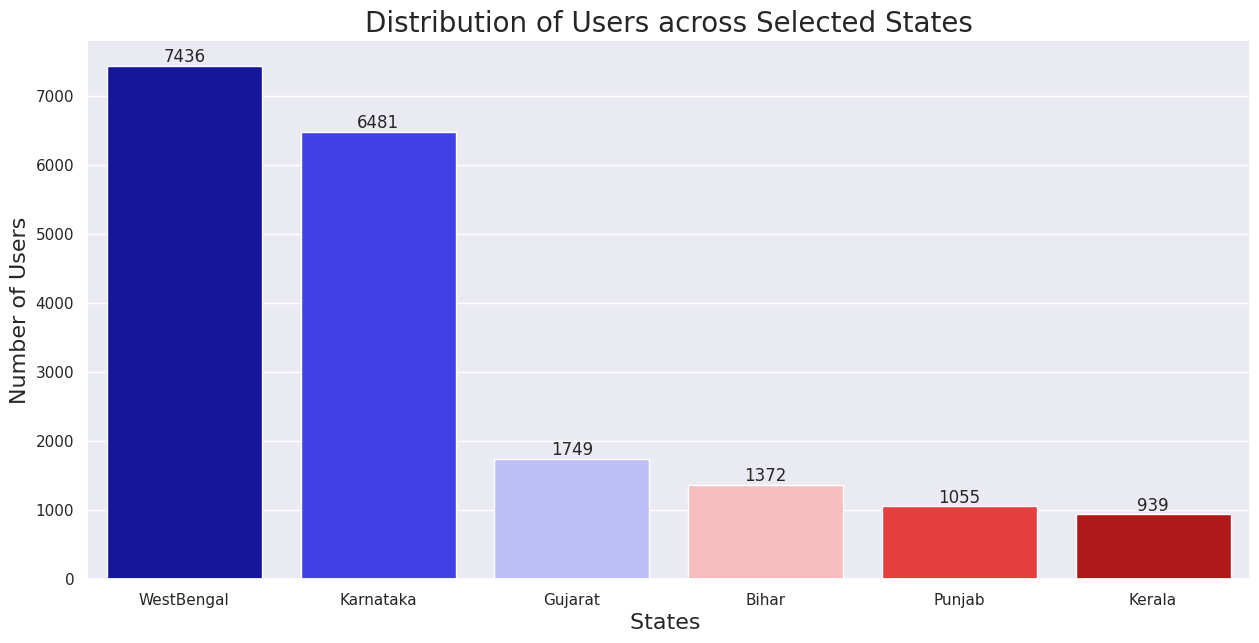

In [89]:
ax = sns.countplot(data= pd_events_data_user,
                   x = 'state',
                   order=  pd_events_data_user['state'].value_counts(ascending=False).index,
                  palette= "seismic")

#cavas = plt.figure(figsize=[20,12])

for label in ax.containers:
    ax.bar_label(label, **MyLabelfont)

ax.set_title('Distribution of Users across Selected States',**MyTitlefont)
ax.set_xlabel('States ',**MySubTitlefont)
ax.set_ylabel('Number of Users',**MySubTitlefont)

plt.show()

In [90]:
sns.set(rc={'figure.figsize':(20,10)})

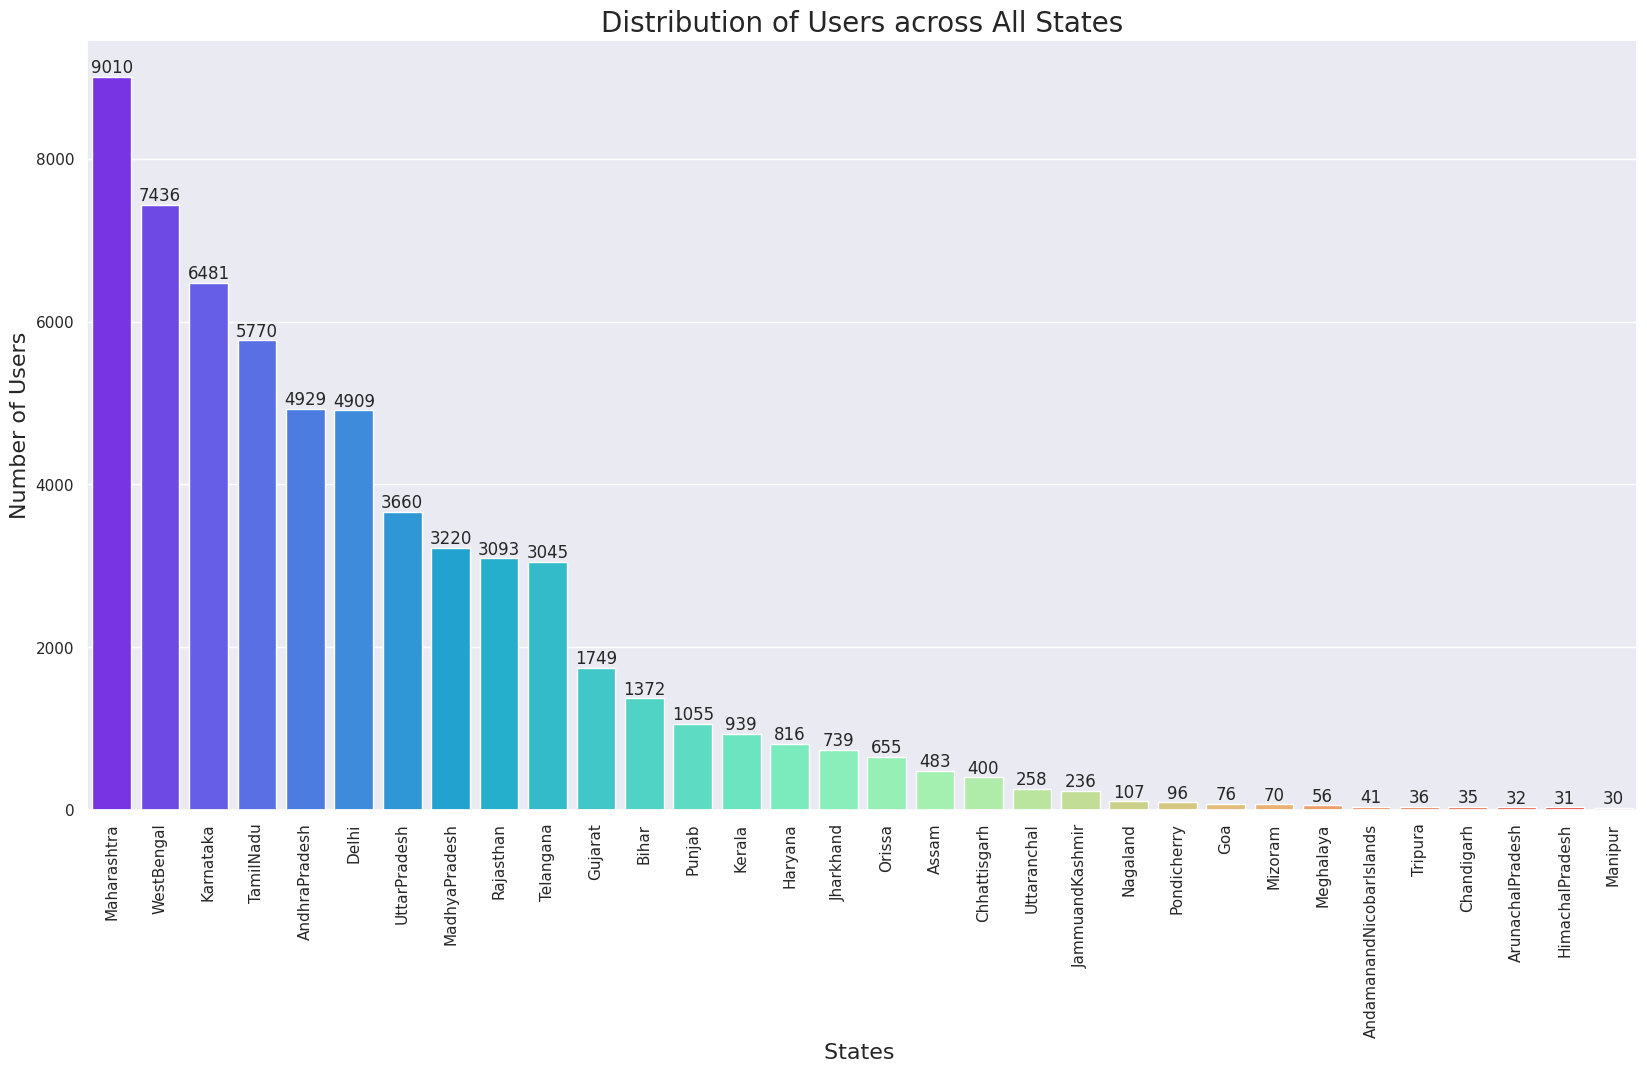

In [91]:
ax = sns.countplot(data= pd_events_data_all,
                   x = 'state',
                   order=  pd_events_data_all['state'].value_counts(ascending=False).index,
                  palette= "rainbow")

#cavas = plt.figure(figsize=[20,12])

for label in ax.containers:
    ax.bar_label(label, **MyLabelfont)
plt.xticks(rotation = 90)

ax.set_title('Distribution of Users across All States',**MyTitlefont)
ax.set_xlabel('States ',**MySubTitlefont)
ax.set_ylabel('Number of Users',**MySubTitlefont)

plt.show()

---
<a name = Section8.2></a>
# **8.2 Distribution of users across phone brands**

In [92]:
#Solution 1

In [93]:
TopMobile = pd_events_data_user.groupby(["eng_phone_brand"])["device_id"].count().nlargest(10)

In [94]:
TopMobile

eng_phone_brand
Millet     4820
Samsung    4004
Huawei     3353
vivo       1552
OPPO       1524
Meizu      1207
coolpad     867
HTC         257
LeTV        213
Lenovo      189
Name: device_id, dtype: int64

In [95]:
ListofTopTenMobileBrands = TopMobile.index

In [96]:
ListofTopTenMobileBrands

Index(['Millet', 'Samsung', 'Huawei', 'vivo', 'OPPO', 'Meizu', 'coolpad',
       'HTC', 'LeTV', 'Lenovo'],
      dtype='object', name='eng_phone_brand')

In [97]:
pd_events_data_user_TopMobile = pd_events_data_user[pd_events_data_user["eng_phone_brand"].isin(ListofTopTenMobileBrands)]

In [98]:
pd_events_data_user_TopMobile.shape

(17986, 12)

In [99]:
# Note at this point of time we have a Dataframe on Top 10 MObile Brands.

In [100]:
sns.set(rc={'figure.figsize':(15,7)})
MyTitlefont      = {"fontname" :"Times New Roman", "fontsize":20}
MySubTitlefont2  = {"fontname" :"Times New Roman", "fontsize":18}
MySubTitlefont   = {"fontname" :"Times New Roman", "fontsize":16}
MyAxisTitlefont  = {"fontname" :"Times New Roman", "fontsize":12}
MyLabelfont      = {"fontname" :"Times New Roman", "fontsize":12}

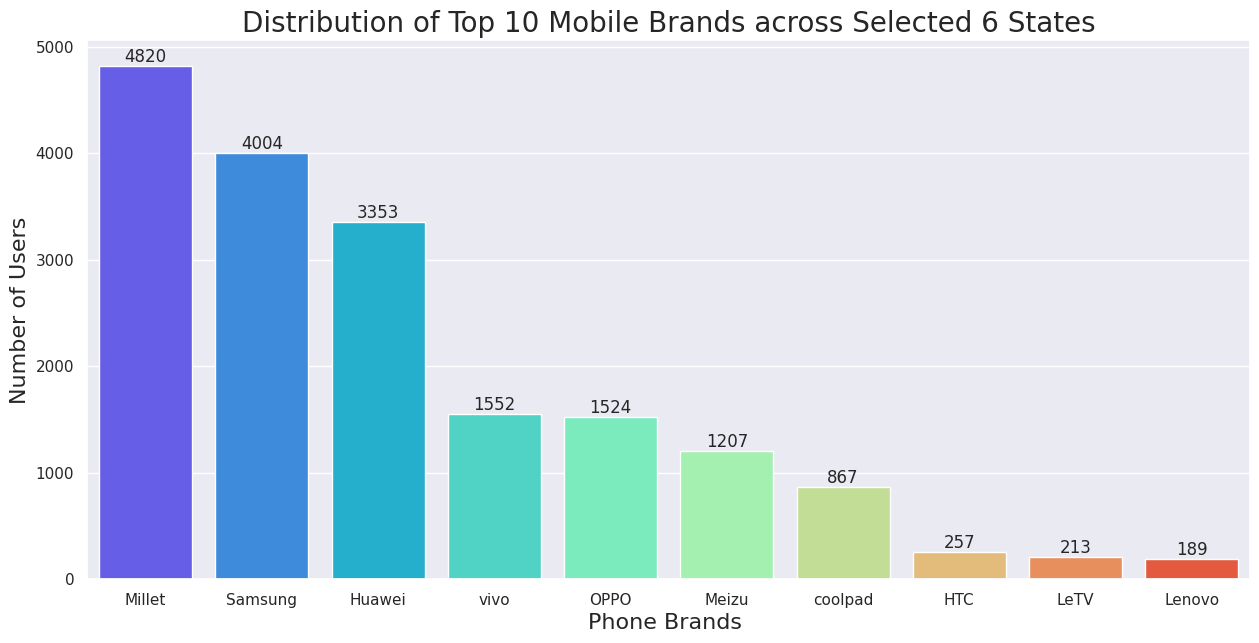

In [101]:
ax = sns.countplot(data= pd_events_data_user_TopMobile,
                   x = 'eng_phone_brand',
                   order=  pd_events_data_user_TopMobile['eng_phone_brand'].value_counts(ascending=False).index,
                  palette= "rainbow")

#cavas = plt.figure(figsize=[10,8])
#plt.xticks(rotation = 30)

for label in ax.containers:
    ax.bar_label(label, **MyLabelfont)

ax.set_title('Distribution of Top 10 Mobile Brands across Selected 6 States',**MyTitlefont)
ax.set_xlabel('Phone Brands ',**MySubTitlefont)
ax.set_ylabel('Number of Users',**MySubTitlefont)


plt.show()

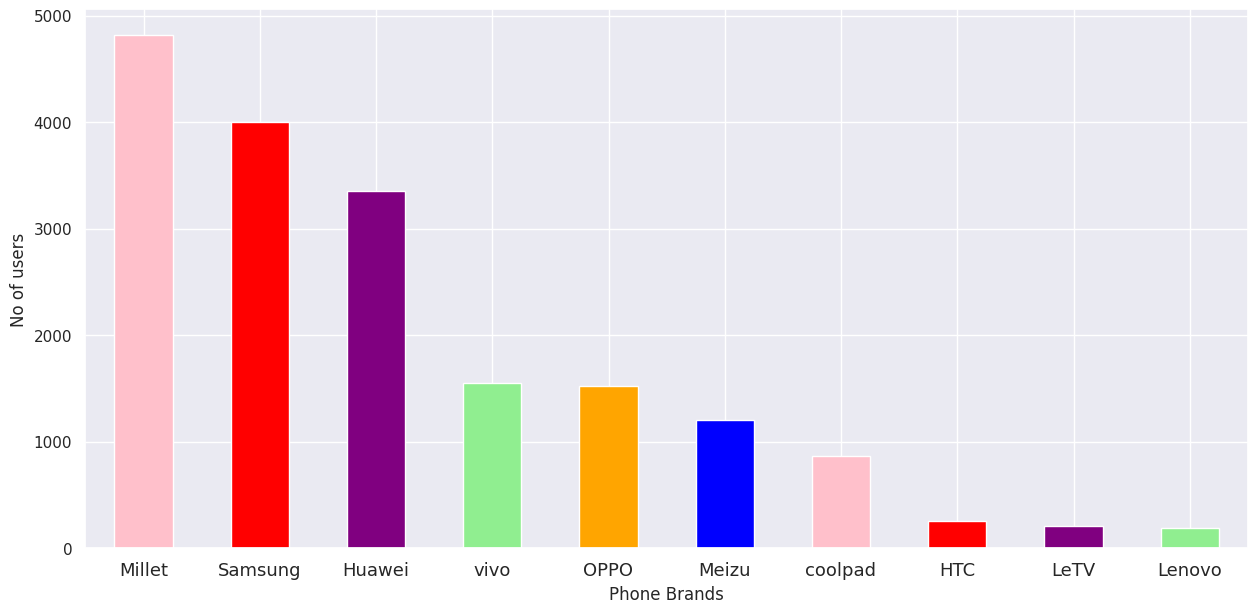

In [102]:
cavas = plt.figure(figsize=[15,7])
pd_events_data_user_TopMobile['eng_phone_brand'].value_counts().plot.bar(color = Colors)
plt.xlabel('Phone Brands')
plt.ylabel('No of users')
plt.xticks(size=13, rotation = 0)
plt.show()

---
<a name = Section8.3></a>
# **8.3 Distribution of users across gender**

In [103]:
pd_events_data_user.groupby(["gender","state"]).device_id.aggregate("count").unstack()

state,Bihar,Gujarat,Karnataka,Kerala,Punjab,WestBengal
gender,,,,,,
F,495,634,2359,372,373,2647
M,877,1115,4122,567,682,4789


In [104]:
pd_events_data_user.groupby(["gender","NewGroup"]).device_id.aggregate("count").unstack()

NewGroup,MiddleAge (30-59),SeniorCtzn (>60),Teenage (1-19),Youth (20-29)
gender,,,,
F,3107,170,217,3386
M,5623,217,543,5769


In [105]:
sns.set(rc={'figure.figsize':(15,7)})
MyTitlefont      = {"fontname" :"Times New Roman", "fontsize":20}
MySubTitlefont2  = {"fontname" :"Times New Roman", "fontsize":18}
MySubTitlefont   = {"fontname" :"Times New Roman", "fontsize":16}
MyAxisTitlefont  = {"fontname" :"Times New Roman", "fontsize":12}
MyLabelfont      = {"fontname" :"Times New Roman", "fontsize":12}

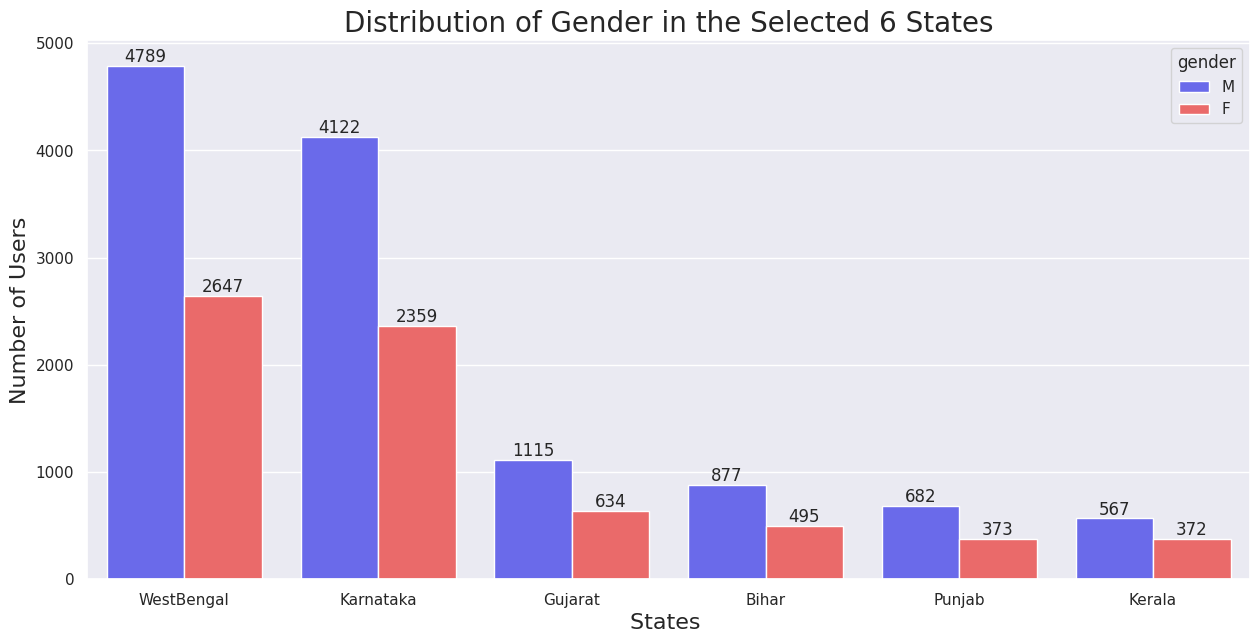

In [106]:
ax = sns.countplot(data= pd_events_data_user,
                   x = 'state',
                   order=  pd_events_data_user['state'].value_counts(ascending=False).index ,
                   palette= "seismic" ,
                   hue ="gender")

#cavas = plt.figure(figsize=[10,8])

for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

#plt.xticks(rotation = 30)

ax.set_title('Distribution of Gender in the Selected 6 States',**MyTitlefont)
ax.set_xlabel('States ',**MySubTitlefont)
ax.set_ylabel('Number of Users',**MySubTitlefont)


plt.show()

In [107]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

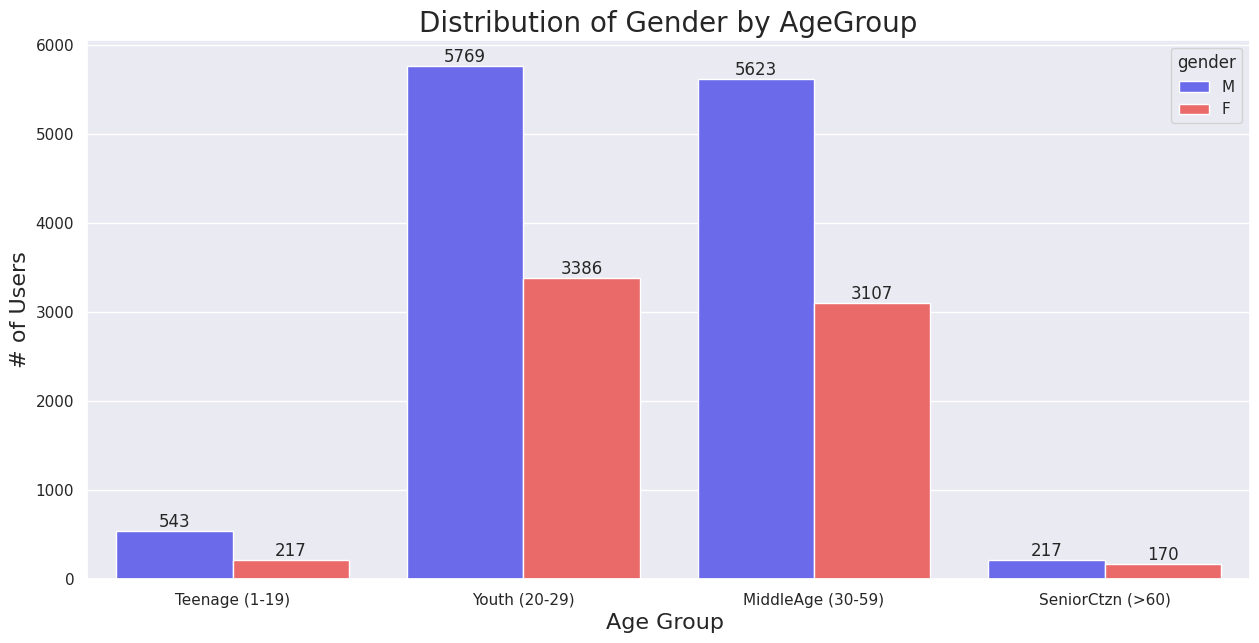

In [108]:
ax = sns.countplot(data= pd_events_data_user,
                   x = 'NewGroup',
                   hue = "gender",
                   order = ["Teenage (1-19)", "Youth (20-29)" , "MiddleAge (30-59)", "SeniorCtzn (>60)"],
                  palette= "seismic")

#cavas = plt.figure(figsize=[20,10])


for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

#plt.xticks(rotation = 30)
ax.set_title('Distribution of Gender by AgeGroup',**MyTitlefont)
ax.set_xlabel('Age Group ',**MySubTitlefont)
ax.set_ylabel('# of Users',**MySubTitlefont)


plt.show()

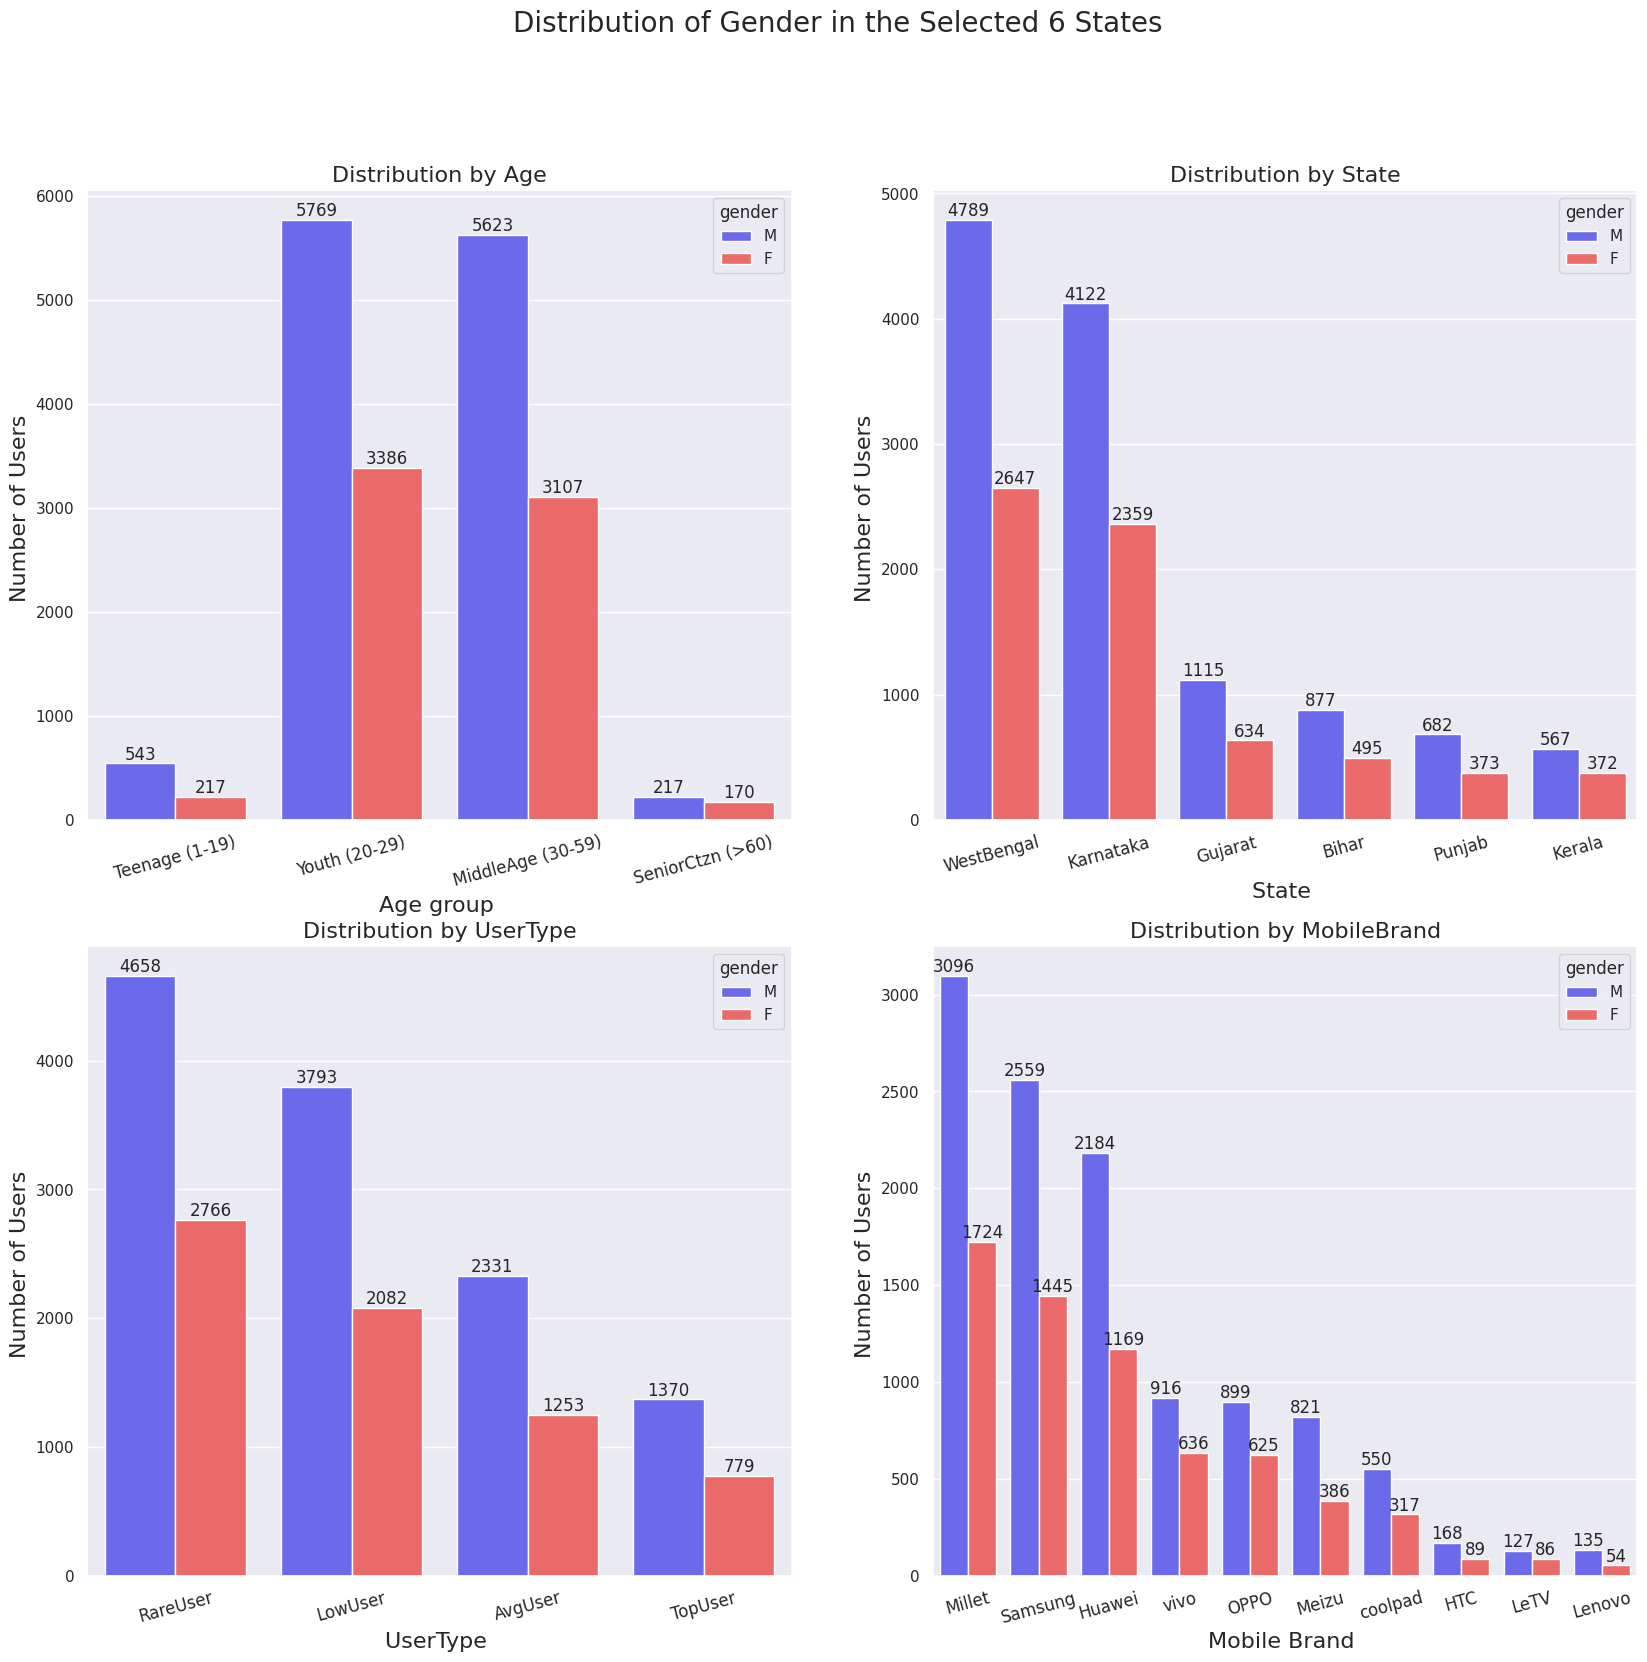

In [109]:
fig, axes = plt.subplots(2, 2,  figsize=(20,18))
fig.suptitle("Distribution of Gender in the Selected 6 States", **MyTitlefont)

#axes[0].set_title("Distribution by Age",**MyAxisTitlefont)
#axes[1].set_title("Distribution by States",**MyAxisTitlefont)
#axes[2].set_title("Distribution by UserType",**MyAxisTitlefont)
#axes[3].set_title("Distribution by Mobile",**MyAxisTitlefont)


plt.subplot(2,2,1)
ax = sns.countplot(data=pd_events_data_user, x ="NewGroup", hue="gender"
                  ,order = ["Teenage (1-19)", "Youth (20-29)" , "MiddleAge (30-59)", "SeniorCtzn (>60)"],
                  palette= "seismic")


plt.xticks(rotation =15,**MyAxisTitlefont)

for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

ax.set_title("Distribution by Age",**MySubTitlefont)
ax.set_xlabel('Age group ',**MySubTitlefont)
ax.set_ylabel('Number of Users ',**MySubTitlefont)


plt.subplot(2,2,2)
ax = sns.countplot(data=pd_events_data_user, x ="state" , hue="gender",
                   order=  pd_events_data_user['state'].value_counts(ascending=False).index,
                  palette= "seismic")

plt.xticks(rotation =15,**MyAxisTitlefont)

for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

ax.set_title("Distribution by State",**MySubTitlefont)
ax.set_xlabel('State ',**MySubTitlefont)
ax.set_ylabel('Number of Users ',**MySubTitlefont)


plt.subplot(2,2,3)
ax = sns.countplot(data=pd_events_data_user, x ="UserType" , hue="gender",
                   order=  ["RareUser","LowUser","AvgUser","TopUser"],
                  palette= "seismic")

plt.xticks(rotation =15,**MyAxisTitlefont)

for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

ax.set_title("Distribution by UserType",**MySubTitlefont)
ax.set_xlabel('UserType ',**MySubTitlefont)
ax.set_ylabel('Number of Users ',**MySubTitlefont)


plt.subplot(2,2,4)
ax = sns.countplot(data=pd_events_data_user_TopMobile, x ="eng_phone_brand" , hue="gender",
                   order=  pd_events_data_user_TopMobile['eng_phone_brand'].value_counts(ascending=False).index,
                   palette= "seismic")

plt.xticks(rotation =15,**MyAxisTitlefont)

for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

ax.set_title("Distribution by MobileBrand",**MySubTitlefont)
ax.set_xlabel('Mobile Brand ',**MySubTitlefont)
ax.set_ylabel('Number of Users ',**MySubTitlefont)


plt.show()

---
<a name = Section8.4></a>
# **8.4 Distribution of users across age segments**

In [110]:
pd_events_data_user.groupby(["NewGroup","gender","state"]).device_id.aggregate("count").unstack()

state                     Bihar  Gujarat  Karnataka  Kerala  Punjab  \
NewGroup          gender                                              
MiddleAge (30-59) F         209      268       1091     156     157   
                  M         387      462       1908     239     302   
SeniorCtzn (>60)  F          15       17         65       7       7   
                  M          18       22         89       6      10   
Teenage (1-19)    F          15       22         67      16      16   
                  M          39       69        171      29      28   
Youth (20-29)     F         256      327       1136     193     193   
                  M         433      562       1954     293     342   

state                     WestBengal  
NewGroup          gender              
MiddleAge (30-59) F             1226  
                  M             2325  
SeniorCtzn (>60)  F               59  
                  M               72  
Teenage (1-19)    F               81  
                  M              207  
Youth (20-29)     F             1281  
                  M             2185

In [111]:
pd_events_data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19032 entries, 0 to 422913
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   device_id         19032 non-null  float64
 1   longitude         19032 non-null  float64
 2   latitude          19032 non-null  float64
 3   city              19032 non-null  object 
 4   state             19032 non-null  object 
 5   eng_phone_brand   19032 non-null  object 
 6   eng_device_model  19032 non-null  object 
 7   gender            19032 non-null  object 
 8   age               19032 non-null  int64  
 9   NewGroup          19032 non-null  object 
 10  NoEvents          19032 non-null  int64  
 11  UserType          19032 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.9+ MB


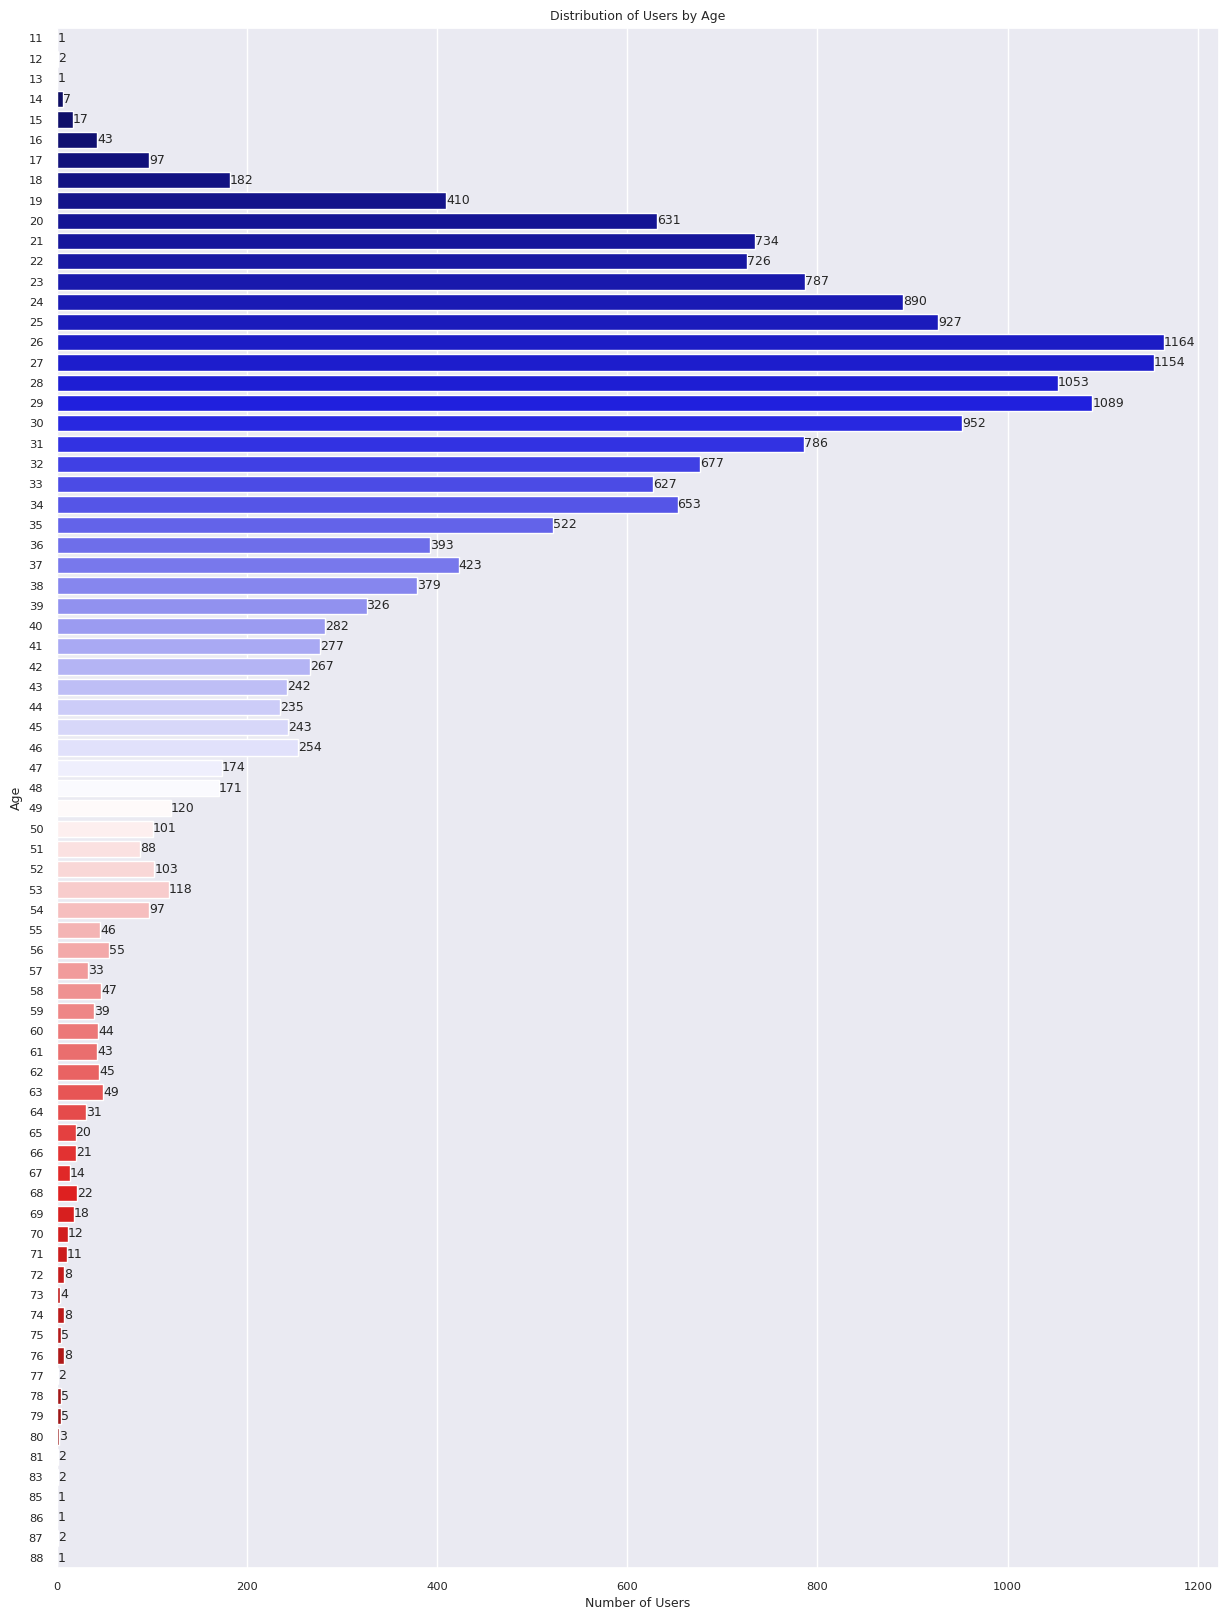

In [112]:
sns.set(rc={'figure.figsize':(15,20)})
sns.set(font_scale= 0.75)

ax = sns.countplot(data= pd_events_data_user, y = 'age', orient ="v", palette = "seismic")

#cavas = plt.figure(figsize=[25,15])

for label in ax.containers:
    ax.bar_label(label)

ax.set_title('Distribution of Users by Age')
ax.set_xlabel('Number of Users')
ax.set_ylabel('Age')


plt.show()

In [113]:
sns.set(rc={'figure.figsize':(20,14)})
MyTitlefont      = {"fontname" :"Times New Roman", "fontsize":20}
MySubTitlefont2  = {"fontname" :"Times New Roman", "fontsize":18}
MySubTitlefont   = {"fontname" :"Times New Roman", "fontsize":16}
MyAxisTitlefont  = {"fontname" :"Times New Roman", "fontsize":12}
MyLabelfont      = {"fontname" :"Times New Roman", "fontsize":12}

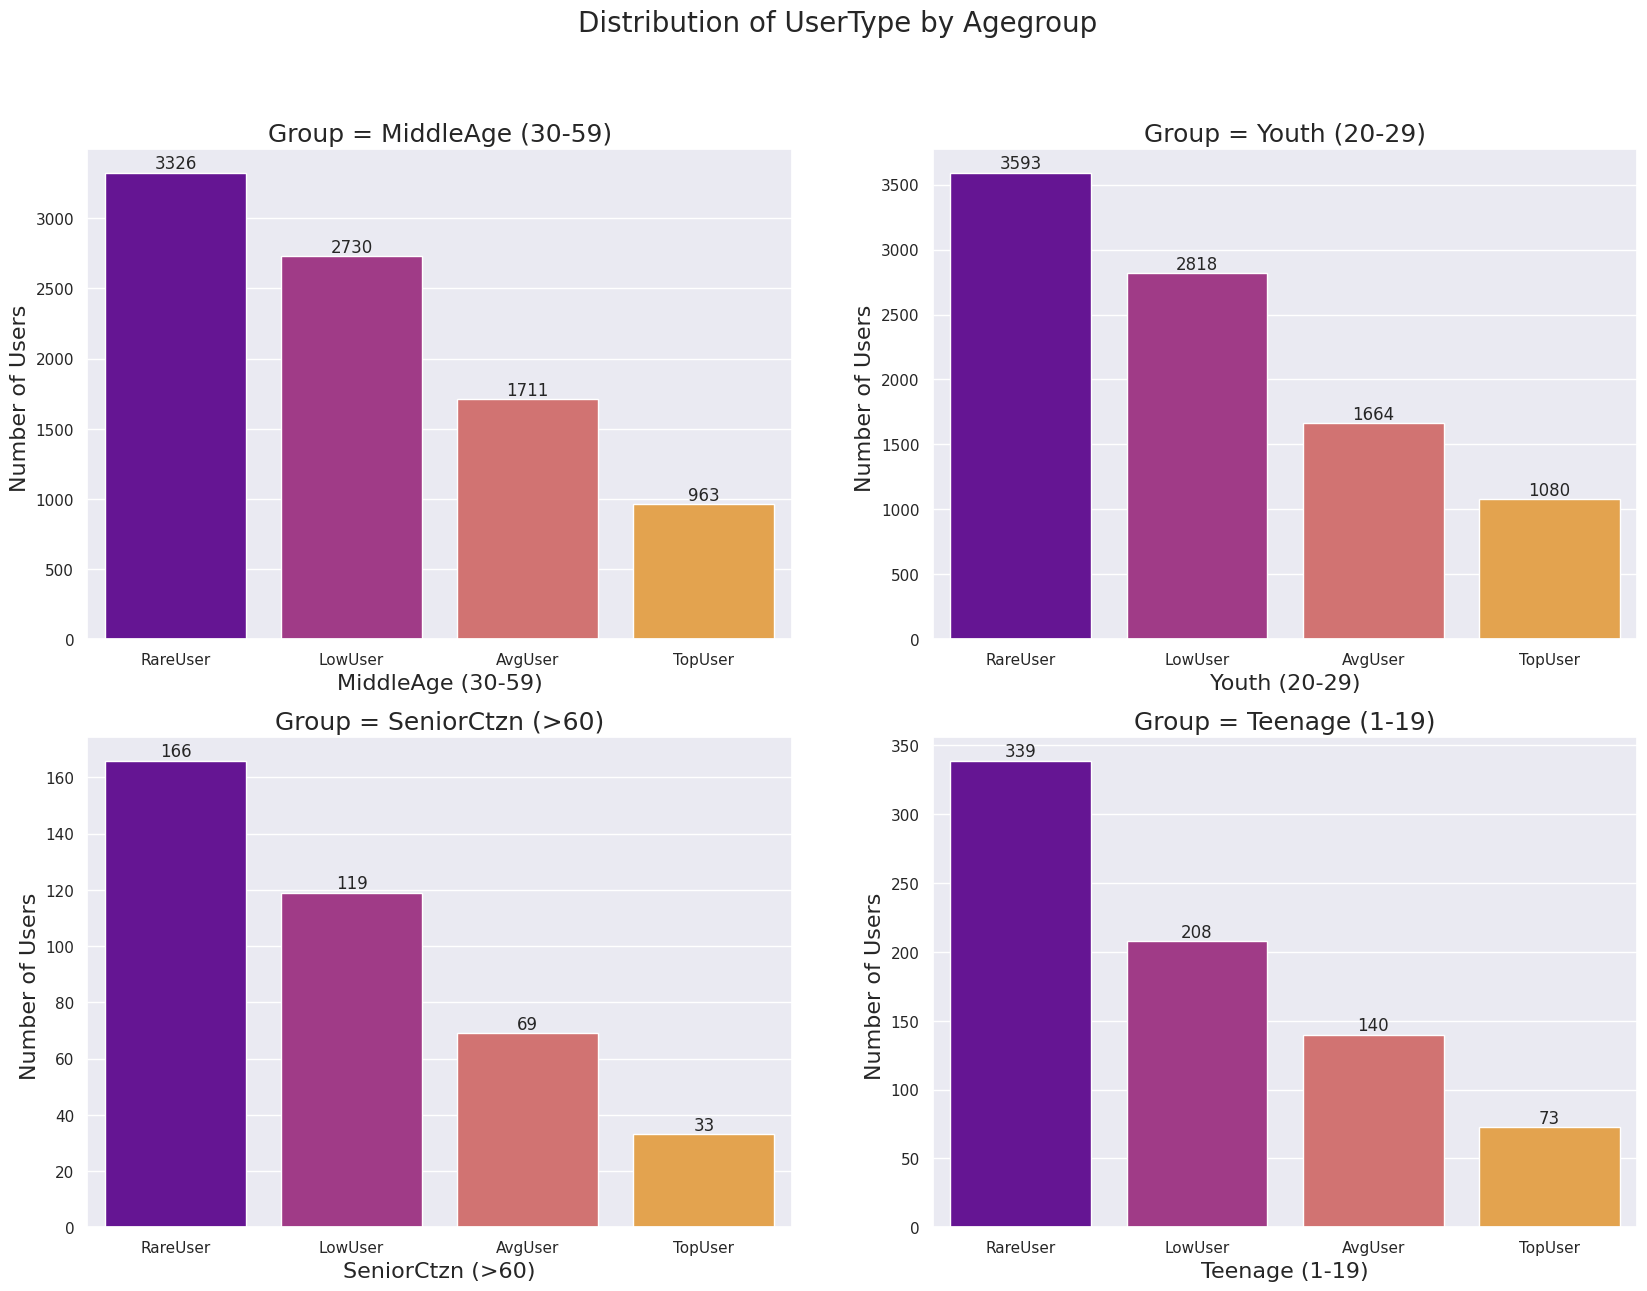

In [114]:
fig, axes = plt.subplots(2, 2,  figsize=(20,14))
fig.suptitle("Distribution of UserType by Agegroup", **MyTitlefont)

for i in enumerate(pd_events_data_user["NewGroup"].unique()):

    plt.subplot(2,2,i[0]+1)
    ax = sns.countplot(data=pd_events_data_user[pd_events_data_user["NewGroup"]== i[1]],
                   x ="UserType",
                   #x ="NewGroup",
                   #order=  pd_events_data_user["eng_phone_brand"].value_counts(ascending=False).index,
                    order=  ["RareUser","LowUser","AvgUser","TopUser"],
                  palette= "plasma")
    for label in ax.containers:
        ax.bar_label(label,**MyLabelfont)

    str1 = "Group = " + i[1]
    ax.set_title(str1,**MySubTitlefont2)
    ax.set_xlabel(i[1],**MySubTitlefont)
    ax.set_ylabel('Number of Users ',**MySubTitlefont)

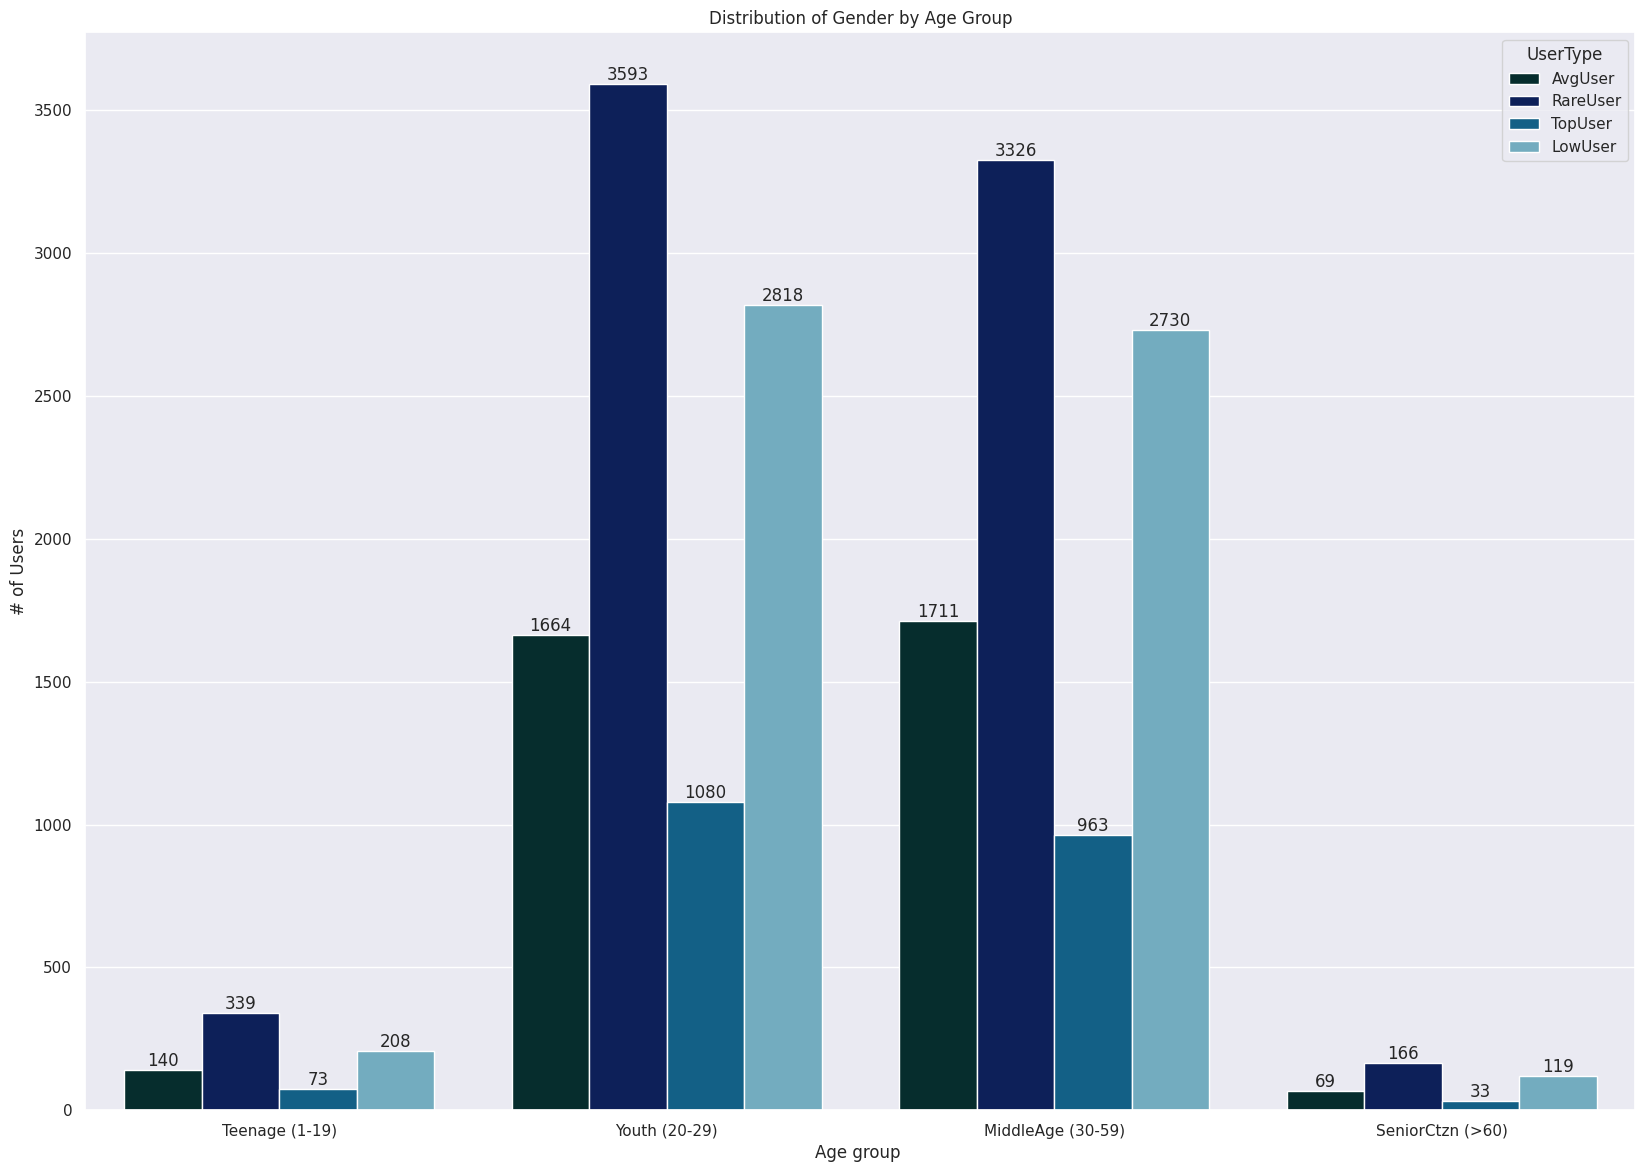

<Figure size 2000x500 with 0 Axes>

In [115]:
ax = sns.countplot(data= pd_events_data_user, x = 'NewGroup',
                   order = ["Teenage (1-19)", "Youth (20-29)" , "MiddleAge (30-59)", "SeniorCtzn (>60)"],
                  hue="UserType",
                  palette = "ocean")

plt.figure(figsize=[20,5])

for label in ax.containers:
    ax.bar_label(label)

ax.set_title('Distribution of Gender by Age Group')
ax.set_xlabel('Age group ')
ax.set_ylabel('# of Users')


plt.show()

---
<a name = Section8.5></a>
# **8.5 Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.

In [116]:
pd_events_data_user_TopMobile.pivot_table("device_id",index = "eng_phone_brand", columns = ["gender","state"], aggfunc = "count", fill_value =0 , margins = True)

gender              F                                                M  \
state           Bihar Gujarat Karnataka Kerala Punjab WestBengal Bihar   
eng_phone_brand                                                          
HTC                 9      11        30      6      5         28    11   
Huawei             79     106       422     55     55        452   147   
LeTV                8       9        34      2      6         27     9   
Lenovo              4       8        19      1      4         18    12   
Meizu              32      28       133     17     16        160    58   
Millet            116     146       581     89     83        709   196   
OPPO               44      58       228     33     27        235    60   
Samsung           121     149       463     85     88        539   210   
coolpad            24      32       112     23     18        108    47   
vivo               34      48       229     38     44        243    71   
All               471     595      2251    349    346       2519   821   

gender                                                        All  
state           Gujarat Karnataka Kerala Punjab WestBengal         
eng_phone_brand                                                    
HTC                  20        53      9     12         63    257  
Huawei              161       722    102    135        917   3353  
LeTV                 13        59      1      4         41    213  
Lenovo               14        35      6      8         60    189  
Meizu                74       275     32     47        335   1207  
Millet              301      1071    136    171       1221   4820  
OPPO                 84       334     30     48        343   1524  
Samsung             240       864    146    137        962   4004  
coolpad              61       173     24     35        210    867  
vivo                 84       301     53     51        356   1552  
All                1052      3887    539    648       4508  17986

In [117]:
pd_events_data_user_TopMobile.pivot_table("device_id",index = ["eng_phone_brand","NewGroup"], columns = ["state","gender"], aggfunc = "count", fill_value =0 , margins = True)

state                             Bihar      Gujarat       Karnataka        \
gender                                F    M       F     M         F     M   
eng_phone_brand NewGroup                                                     
HTC             MiddleAge (30-59)     4    7       7     9        12    21   
                SeniorCtzn (>60)      1    0       0     1         1     2   
                Teenage (1-19)        0    0       0     2         1     1   
                Youth (20-29)         4    4       4     8        16    29   
Huawei          MiddleAge (30-59)    33   74      45    65       206   374   
                SeniorCtzn (>60)      3    2       4     2        14    21   
                Teenage (1-19)        0    5       2     4        10    21   
                Youth (20-29)        43   66      55    90       192   306   
LeTV            MiddleAge (30-59)     6    5       3     6        18    28   
                SeniorCtzn (>60)      0    0       0     0         1     1   
                Teenage (1-19)        0    0       0     1         1     2   
                Youth (20-29)         2    4       6     6        14    28   
Lenovo          MiddleAge (30-59)     3    5       5     3         9    17   
                SeniorCtzn (>60)      0    0       0     0         0     2   
                Teenage (1-19)        0    1       0     0         3     2   
                Youth (20-29)         1    6       3    11         7    14   
Meizu           MiddleAge (30-59)    13   19      10    28        60    90   
                SeniorCtzn (>60)      0    1       0     0         2     2   
                Teenage (1-19)        0    2       2     2         8    15   
                Youth (20-29)        19   36      16    44        63   168   
Millet          MiddleAge (30-59)    48   76      61   120       268   484   
                SeniorCtzn (>60)      2    4       2     7        17    17   
                Teenage (1-19)        6   13       5    23        12    54   
                Youth (20-29)        60  103      78   151       284   516   
OPPO            MiddleAge (30-59)    14   16      18    41        91   136   
                SeniorCtzn (>60)      2    0       2     1         3     8   
                Teenage (1-19)        3    1       3     5        11    19   
                Youth (20-29)        25   43      35    37       123   171   
Samsung         MiddleAge (30-59)    59  106      77   114       235   426   
                SeniorCtzn (>60)      5    3       5     7        17    19   
                Teenage (1-19)        2    9       6    17         7    29   
                Youth (20-29)        55   92      61   102       204   390   
coolpad         MiddleAge (30-59)     9   16      13    18        56    81   
                SeniorCtzn (>60)      1    2       2     1         3     8   
                Teenage (1-19)        1    1       3     4         2     6   
                Youth (20-29)        13   28      14    38        51    78   
vivo            MiddleAge (30-59)    11   36      14    30        91   126   
                SeniorCtzn (>60)      0    3       2     0         5     5   
                Teenage (1-19)        2    4       0     6         7    15   
                Youth (20-29)        21   28      32    48       126   155   
All                                 471  821     595  1052      2251  3887   

state                             Kerala      Punjab      WestBengal        \
gender                                 F    M      F    M          F     M   
eng_phone_brand NewGroup                                                     
HTC             MiddleAge (30-59)      3    4      1    6         15    29   
                SeniorCtzn (>60)       0    0      0    0          0     1   
                Teenage (1-19)         0    0      0    0          1     5   
                Youth (20-29)          3    5      4    6         12    28   
Huawei          Middl

In [118]:
sns.set(rc={'figure.figsize':(20,20)})
MyTitlefont      = {"fontname" :"Times New Roman", "fontsize":20}
MySubTitlefont2  = {"fontname" :"Times New Roman", "fontsize":18}
MySubTitlefont   = {"fontname" :"Times New Roman", "fontsize":16}
MyAxisTitlefont  = {"fontname" :"Times New Roman", "fontsize":12}
MyLabelfont      = {"fontname" :"Times New Roman", "fontsize":12}

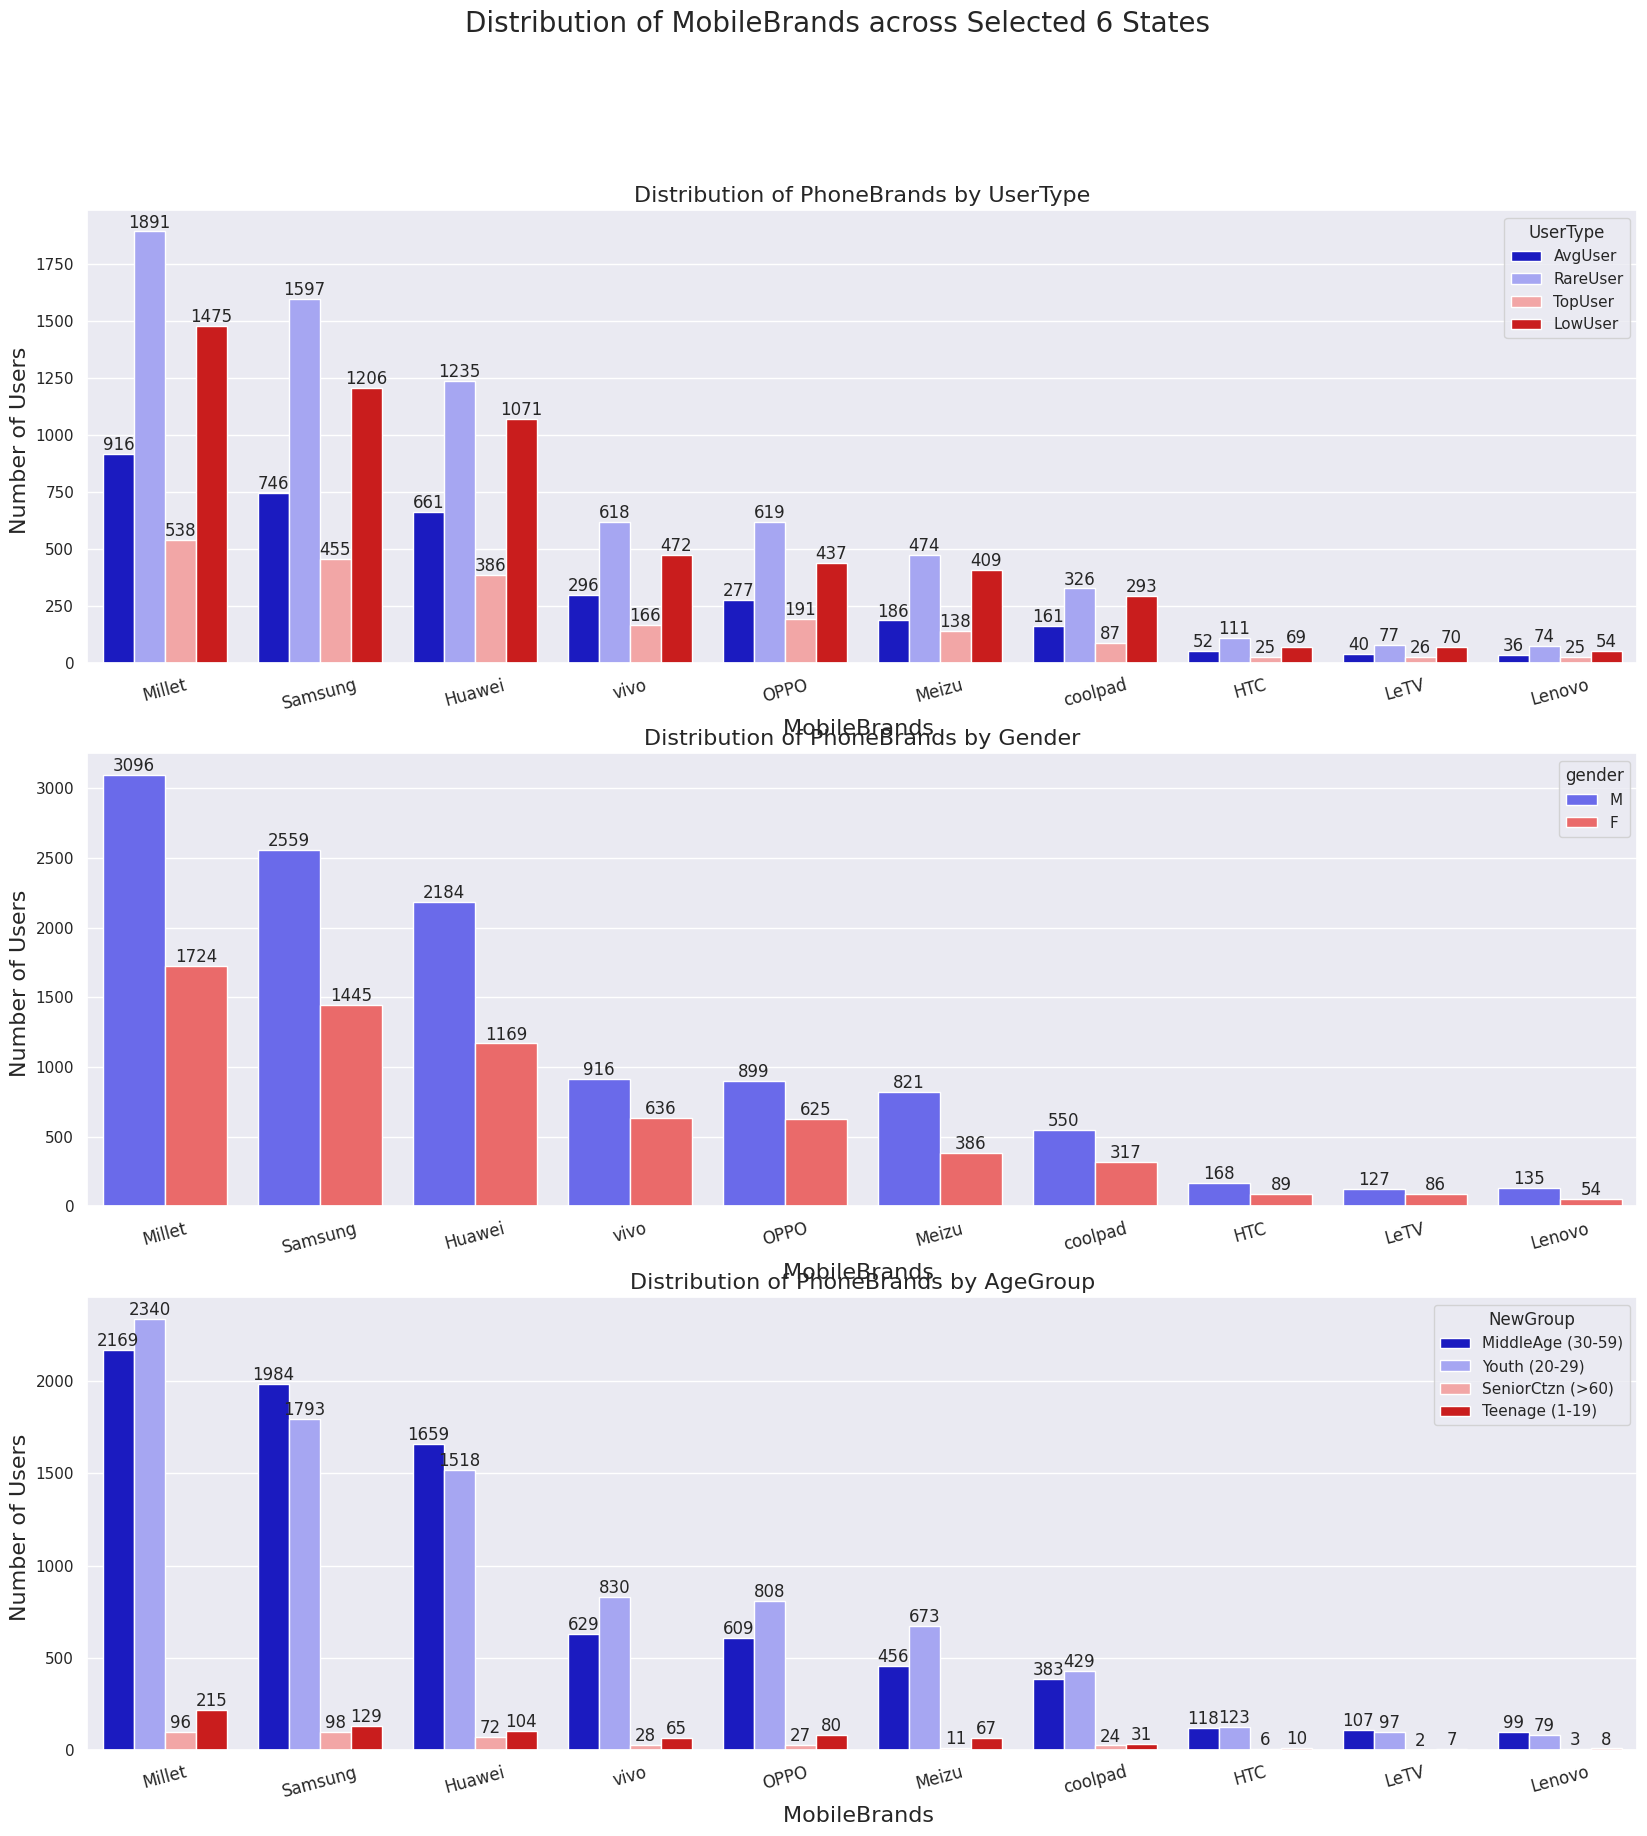

In [119]:
fig, axes = plt.subplots(3, 1,  figsize=(20,20))
fig.suptitle("Distribution of MobileBrands across Selected 6 States", **MyTitlefont)

#axes[0].set_title("Distribution by Age",**MyAxisTitlefont)
#axes[1].set_title("Distribution by States",**MyAxisTitlefont)
#axes[2].set_title("Distribution by UserType",**MyAxisTitlefont)
#axes[3].set_title("Distribution by Mobile",**MyAxisTitlefont)


plt.subplot(3,1,1)
ax = sns.countplot(data=pd_events_data_user_TopMobile, x ="eng_phone_brand",
                  order=  pd_events_data_user_TopMobile['eng_phone_brand'].value_counts(ascending=False).index,
                   #order = ["Teenage (1-19)", "Youth (20-29)" , "MiddleAge (30-59)", "SeniorCtzn (>60)"],
                   hue="UserType",
                  palette= "seismic")


plt.xticks(rotation =15,**MyAxisTitlefont)

for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

ax.set_title("Distribution of PhoneBrands by UserType",**MySubTitlefont)
ax.set_xlabel('MobileBrands ',**MySubTitlefont)
ax.set_ylabel('Number of Users ',**MySubTitlefont)


plt.subplot(3,1,2)
ax = sns.countplot(data=pd_events_data_user_TopMobile, x ="eng_phone_brand", hue="gender",
                   order=  pd_events_data_user_TopMobile['eng_phone_brand'].value_counts(ascending=False).index,
                   #order=  pd_events_data_user['state'].value_counts(ascending=False).index,
                  palette= "seismic")

plt.xticks(rotation =15,**MyAxisTitlefont)

for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

ax.set_title("Distribution of PhoneBrands by Gender",**MySubTitlefont)
ax.set_xlabel('MobileBrands ',**MySubTitlefont)
ax.set_ylabel('Number of Users ',**MySubTitlefont)


plt.subplot(3,1,3)
ax = sns.countplot(data=pd_events_data_user_TopMobile, x ="eng_phone_brand", hue="NewGroup",
                   order=  pd_events_data_user_TopMobile['eng_phone_brand'].value_counts(ascending=False).index,
                   #order=  ["RareUser","LowUser","AvgUser","TopUser"],
                  palette= "seismic")

plt.xticks(rotation =15,**MyAxisTitlefont)

for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

ax.set_title("Distribution of PhoneBrands by AgeGroup",**MySubTitlefont)
ax.set_xlabel('MobileBrands ',**MySubTitlefont)
ax.set_ylabel('Number of Users ',**MySubTitlefont)

'''
plt.subplot(2,2,4)
ax = sns.countplot(data=pd_events_data_user_TopMobile, x ="eng_phone_brand" , hue="gender",
                   #order=  pd_events_data_user['state'].value_counts(ascending=False).index,
                  palette= "seismic")

plt.xticks(rotation =15,**MyAxisTitlefont)

for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

ax.set_title("Distribution by MobileBrand",**MySubTitlefont)
ax.set_xlabel('Mobile Brand ',**MySubTitlefont)
ax.set_ylabel('Number of Users ',**MySubTitlefont)

'''
plt.show()

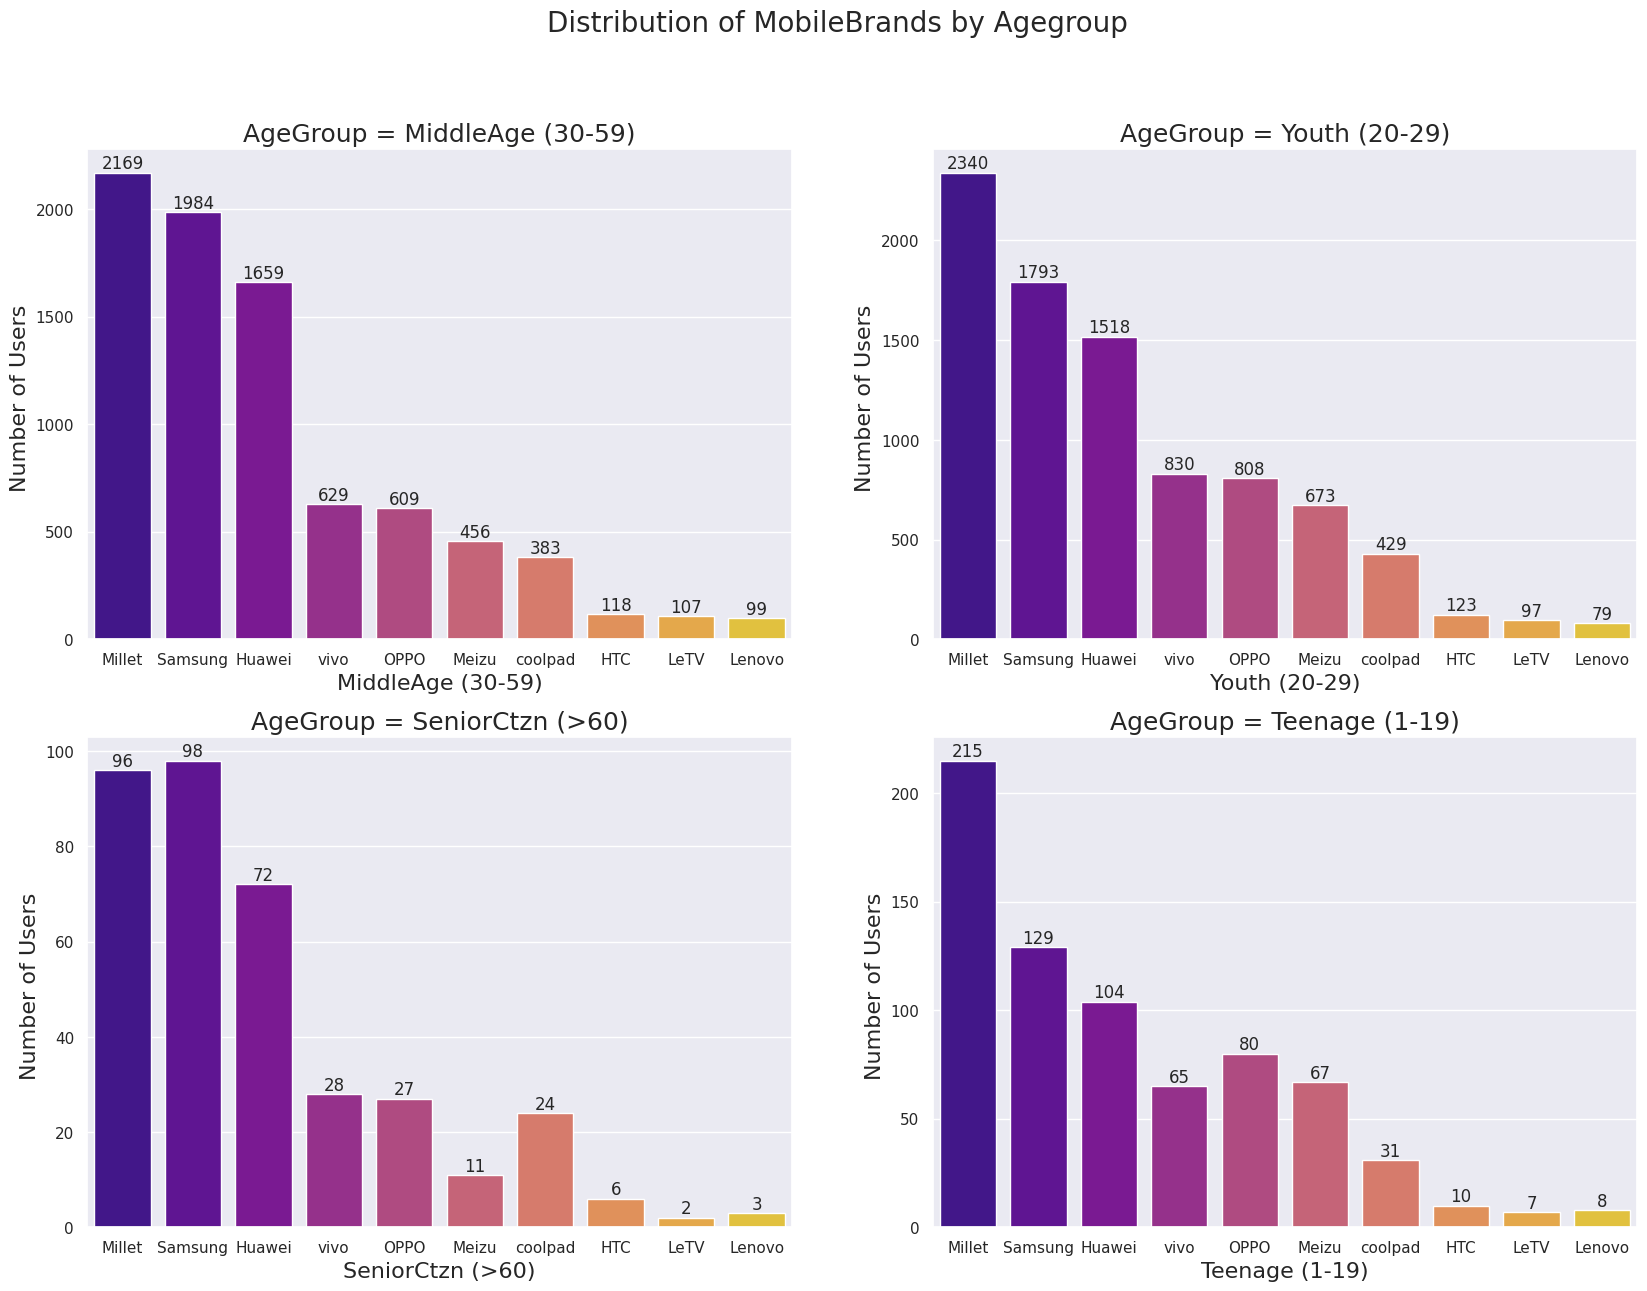

In [120]:
fig, axes = plt.subplots(2, 2,  figsize=(20,14))
fig.suptitle("Distribution of MobileBrands by Agegroup", **MyTitlefont)
for i in enumerate(pd_events_data_user_TopMobile["NewGroup"].unique()):

    plt.subplot(2,2,i[0]+1)
    ax = sns.countplot(data=pd_events_data_user_TopMobile[pd_events_data_user_TopMobile["NewGroup"]== i[1]],
                   x ="eng_phone_brand",
                   #x ="NewGroup",
                   order=  pd_events_data_user_TopMobile["eng_phone_brand"].value_counts(ascending=False).index,
                  palette= "plasma")
    for label in ax.containers:
        ax.bar_label(label,**MyLabelfont)

    str1 = "AgeGroup = " + i[1]
    ax.set_title(str1,**MySubTitlefont2)
    ax.set_xlabel(i[1],**MySubTitlefont)
    ax.set_ylabel('Number of Users ',**MySubTitlefont)

In [121]:
# Try to Plot a Graph for this

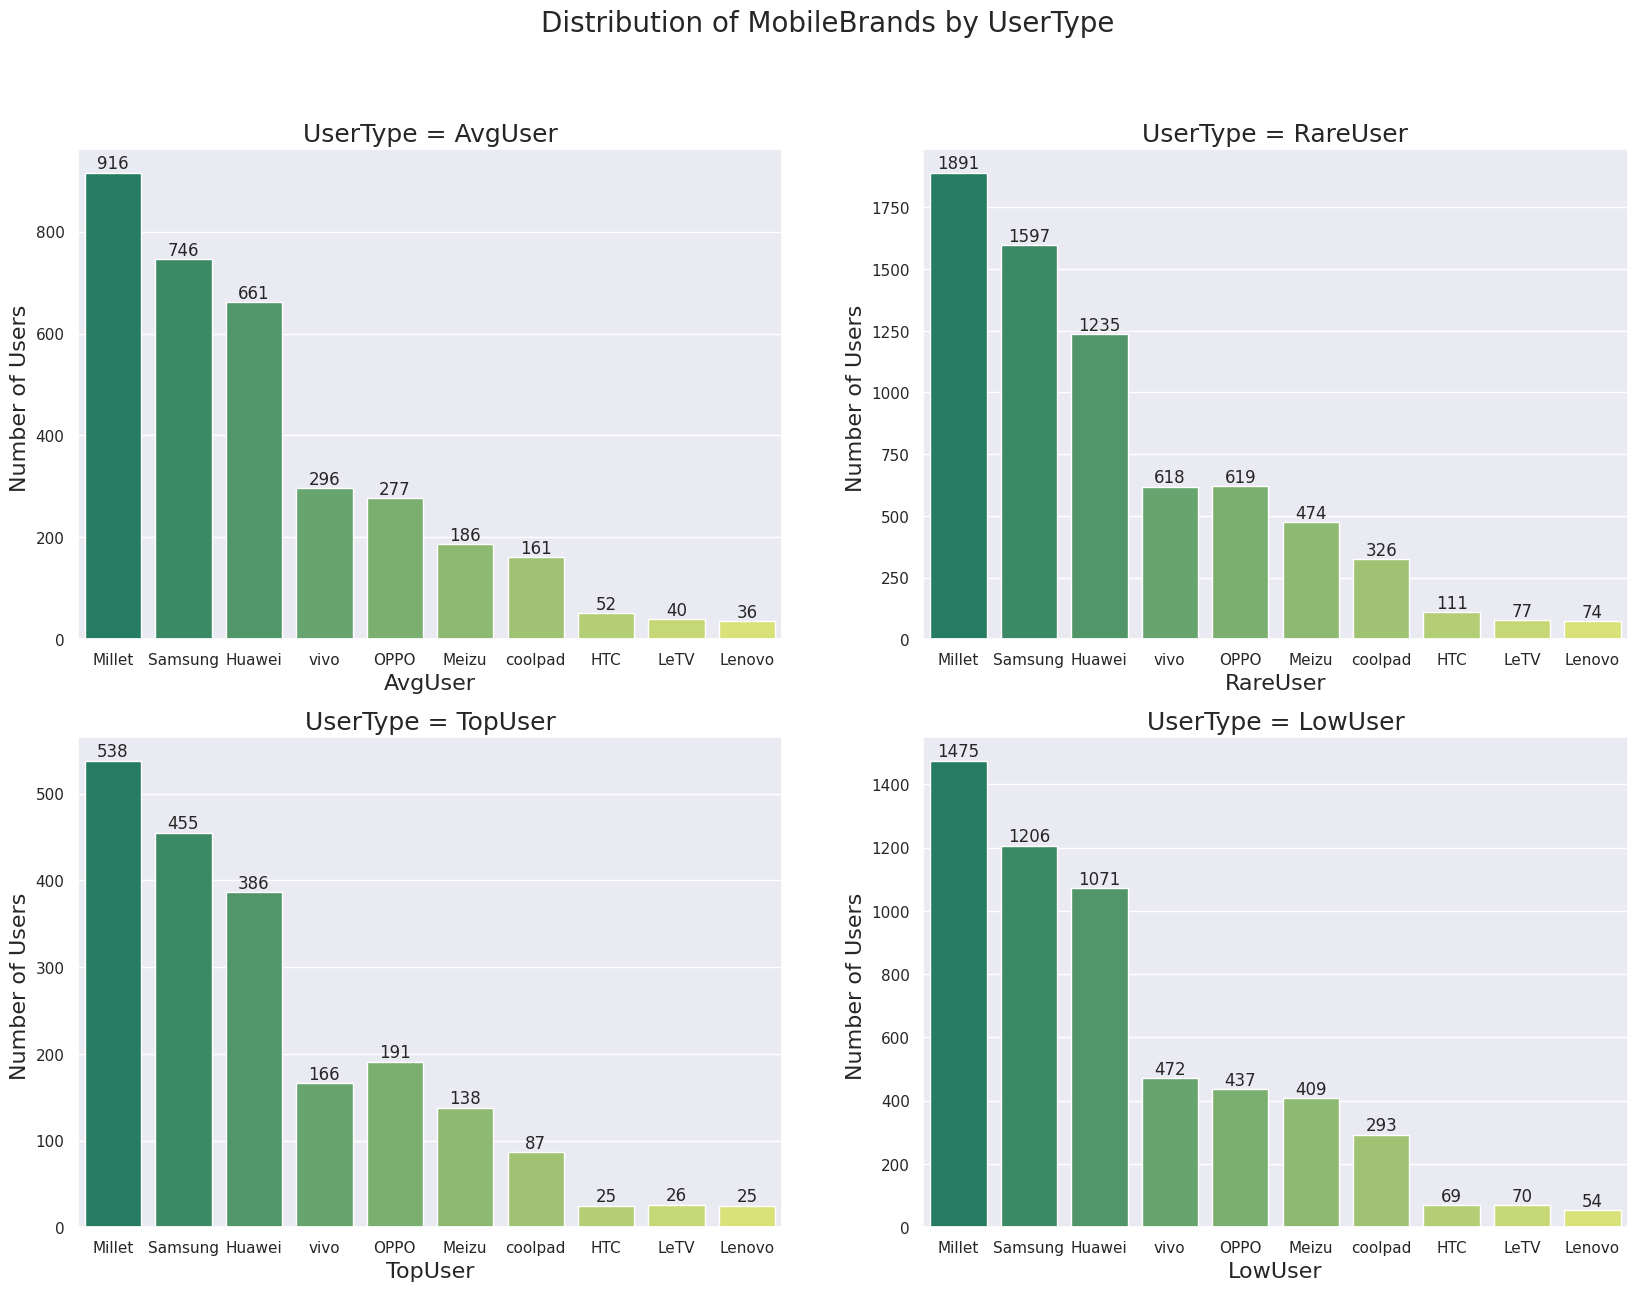

In [122]:
fig, axes = plt.subplots(2, 2,  figsize=(20,14))
fig.suptitle("Distribution of MobileBrands by UserType", **MyTitlefont)
for i in enumerate(pd_events_data_user_TopMobile["UserType"].unique()):

    plt.subplot(2,2,i[0]+1)
    ax = sns.countplot(data=pd_events_data_user_TopMobile[pd_events_data_user_TopMobile["UserType"]== i[1]],
                   x ="eng_phone_brand",
                   #x ="NewGroup",
                   order=  pd_events_data_user_TopMobile["eng_phone_brand"].value_counts(ascending=False).index,
                  palette= "summer")
    for label in ax.containers:
        ax.bar_label(label,**MyLabelfont)

    str1 = "UserType = " + i[1]
    ax.set_title(str1,**MySubTitlefont2)
    ax.set_xlabel(i[1],**MySubTitlefont)
    ax.set_ylabel('Number of Users ',**MySubTitlefont)

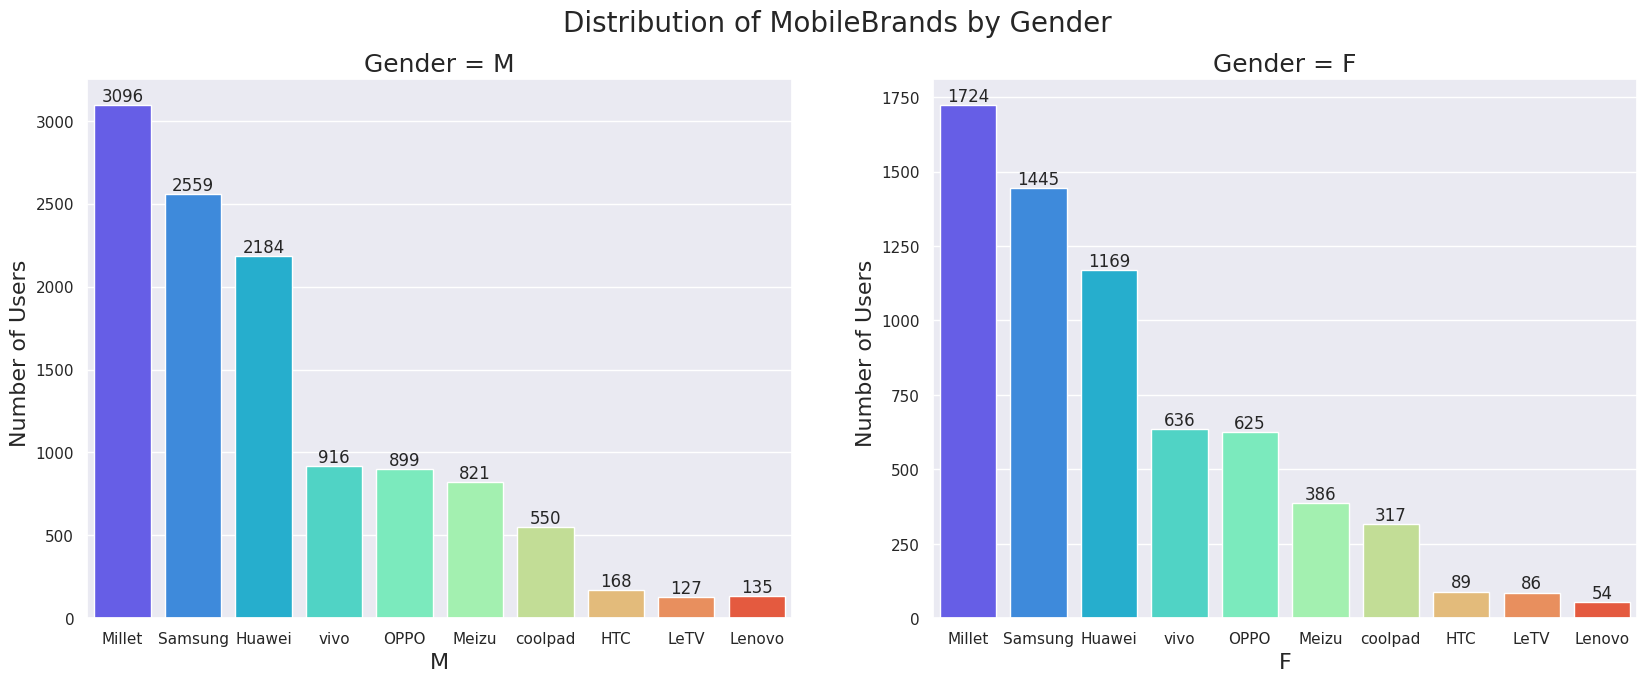

In [123]:
fig, axes = plt.subplots(1, 2,  figsize=(20,7))
fig.suptitle("Distribution of MobileBrands by Gender", **MyTitlefont)
for i in enumerate(pd_events_data_user_TopMobile["gender"].unique()):

    plt.subplot(1,2,i[0]+1)
    ax = sns.countplot(data=pd_events_data_user_TopMobile[pd_events_data_user_TopMobile["gender"]== i[1]],
                   x ="eng_phone_brand",
                   #x ="NewGroup",
                   order=  pd_events_data_user_TopMobile["eng_phone_brand"].value_counts(ascending=False).index,
                  palette= "rainbow")
    for label in ax.containers:
        ax.bar_label(label,**MyLabelfont)

    str1 = "Gender = " + i[1]
    ax.set_title(str1,**MySubTitlefont2)
    ax.set_xlabel(i[1],**MySubTitlefont)
    ax.set_ylabel('Number of Users ',**MySubTitlefont)

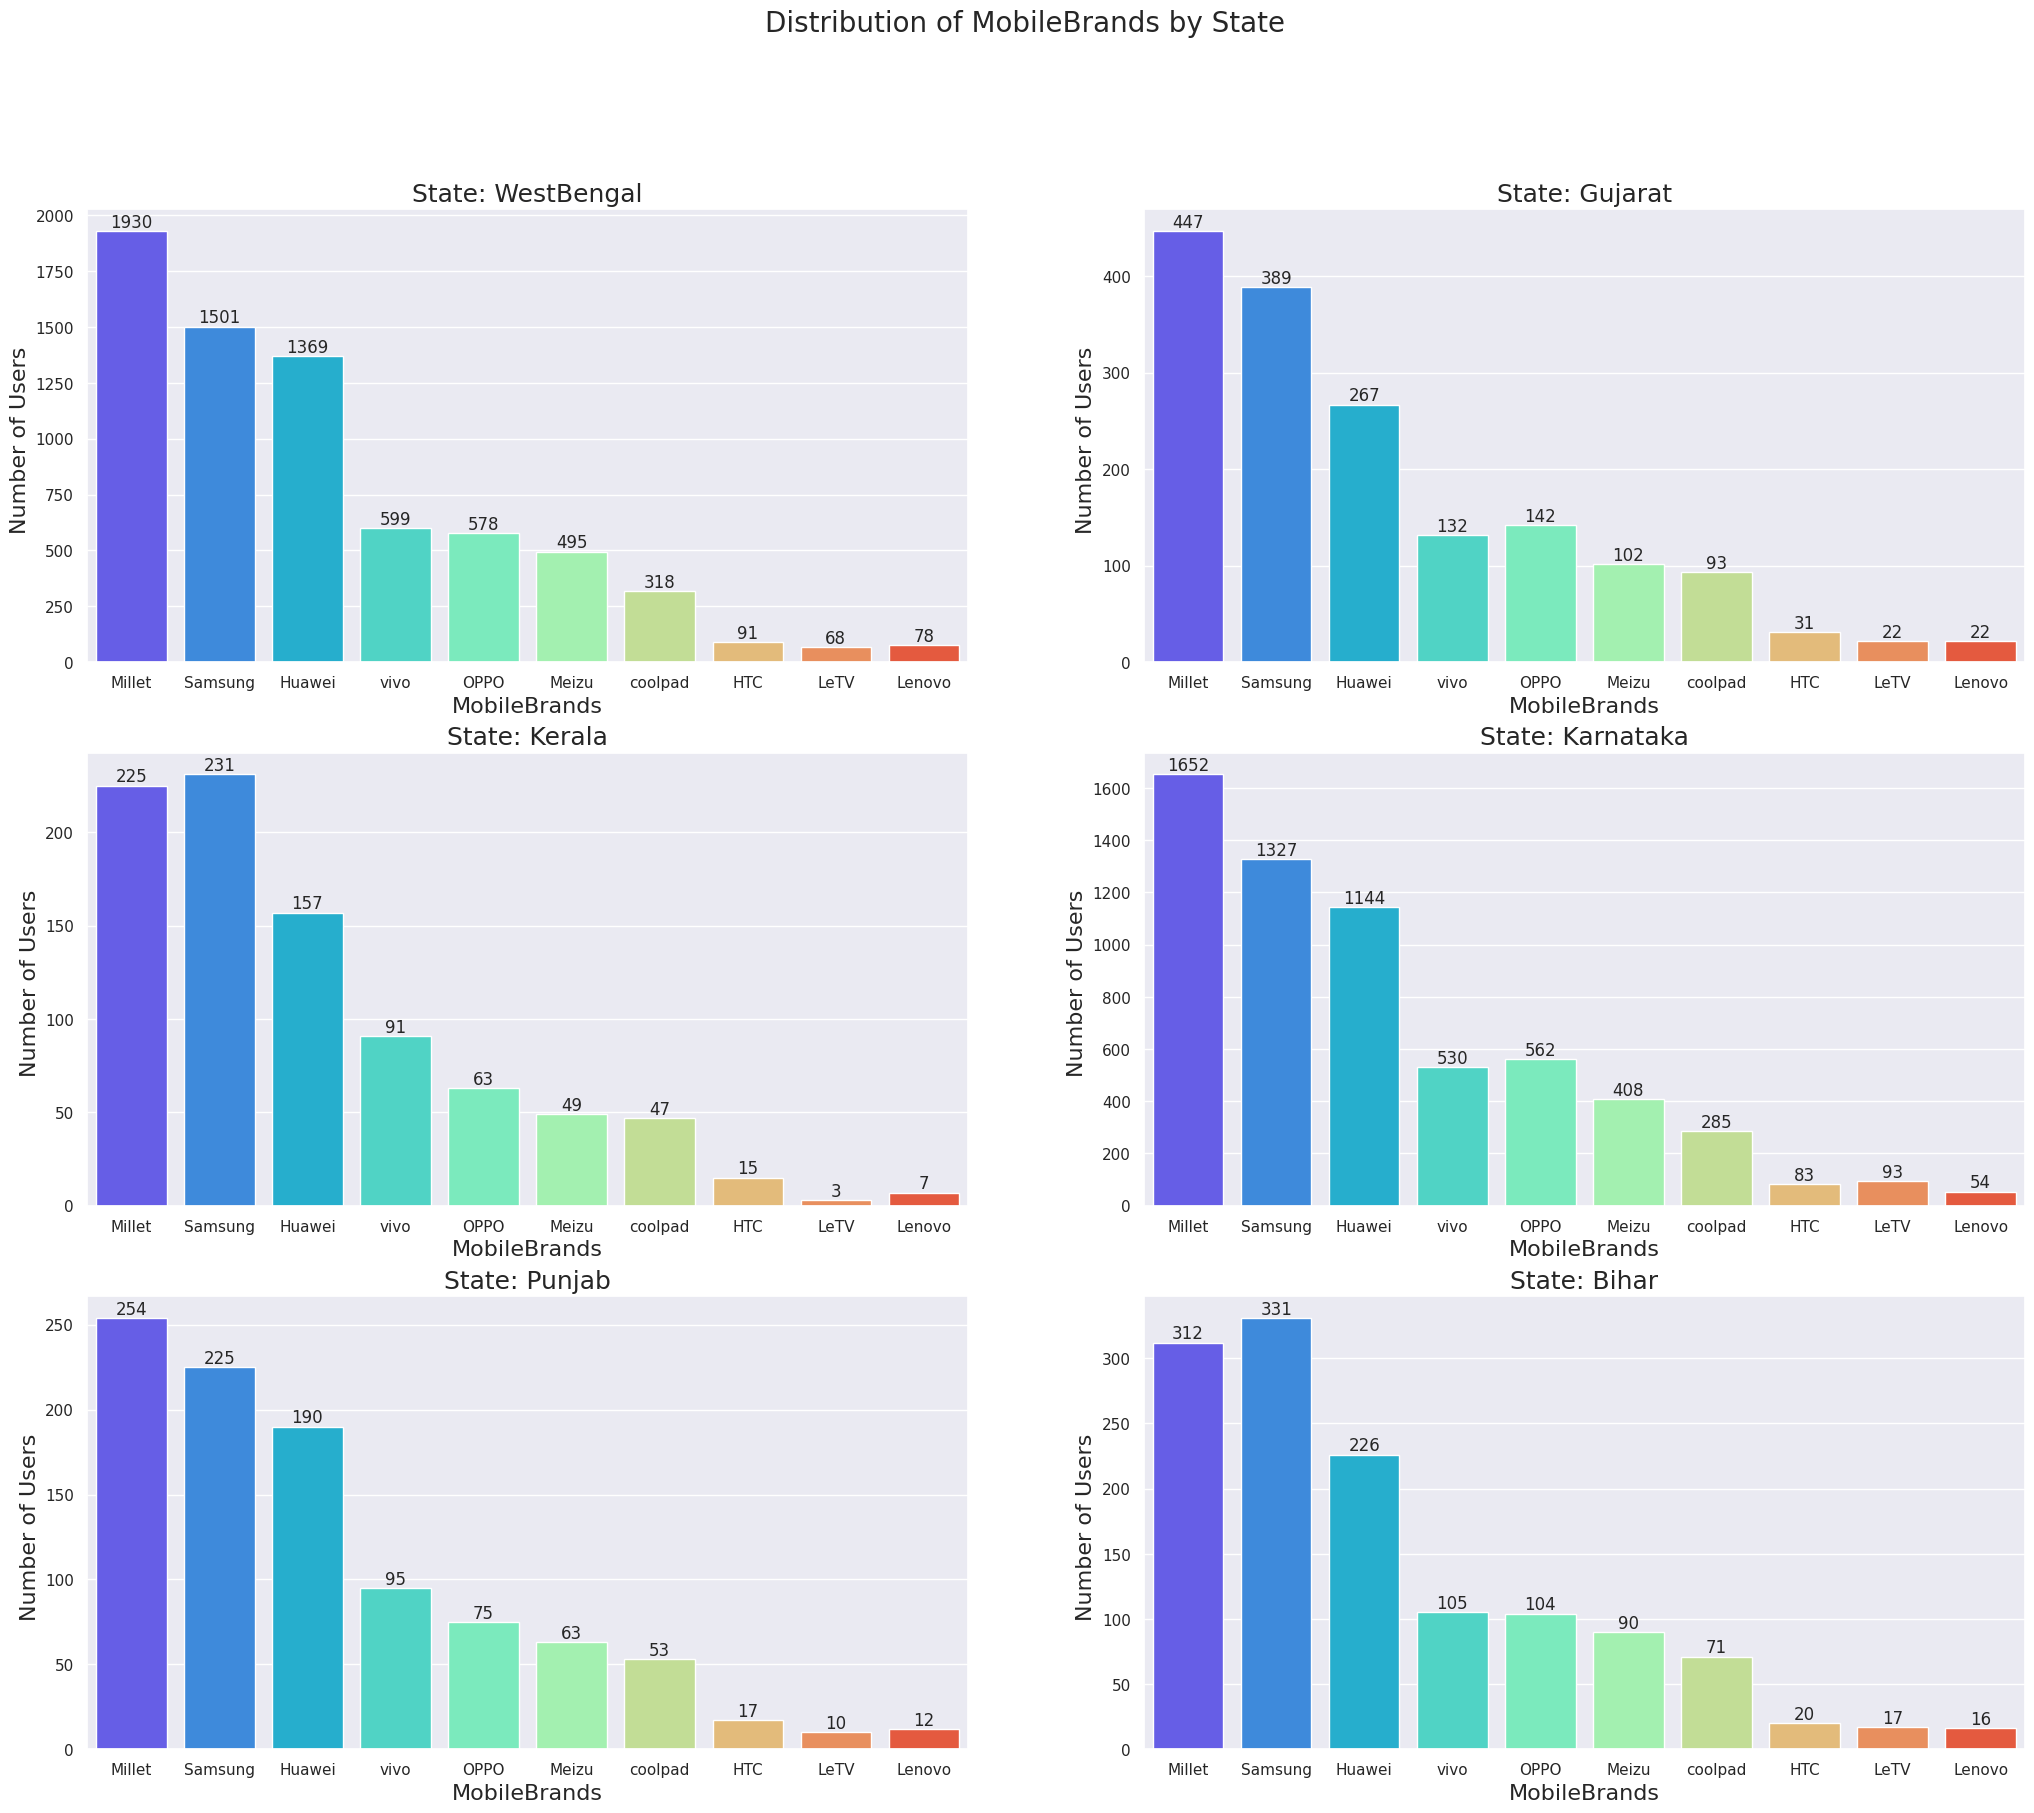

In [124]:
fig, axes = plt.subplots(3, 2,  figsize=(25,20))
fig.suptitle("Distribution of MobileBrands by State", **MyTitlefont)
for i in enumerate(pd_events_data_user_TopMobile["state"].unique()):

    plt.subplot(3,2,i[0]+1)
    ax = sns.countplot(data=pd_events_data_user_TopMobile[pd_events_data_user_TopMobile["state"]== i[1]],
                   x ="eng_phone_brand",
                   #x ="NewGroup",
                   order=  pd_events_data_user_TopMobile["eng_phone_brand"].value_counts(ascending=False).index,
                  palette= "rainbow")
    for label in ax.containers:
        ax.bar_label(label,**MyLabelfont)

    str1 = "State: " + i[1]
    ax.set_title(str1,**MySubTitlefont2)
    ax.set_xlabel("MobileBrands",**MySubTitlefont)
    ax.set_ylabel('Number of Users ',**MySubTitlefont)

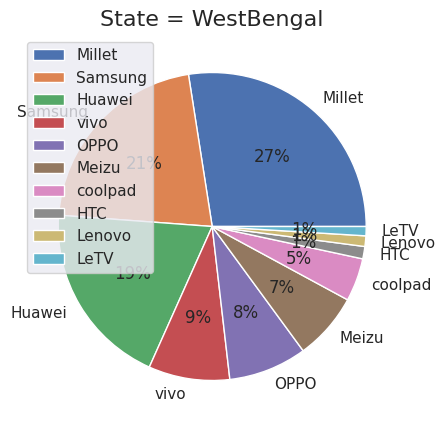

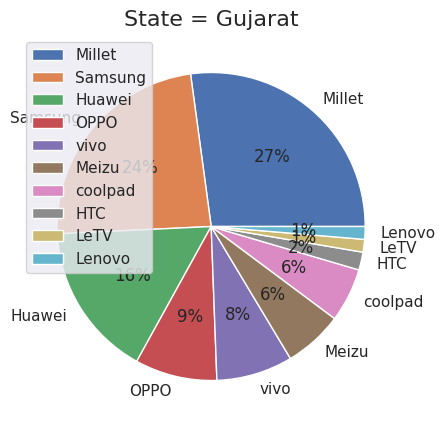

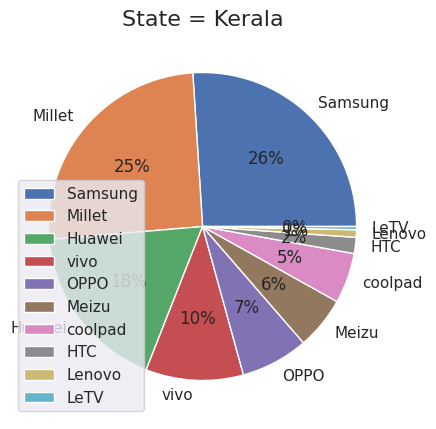

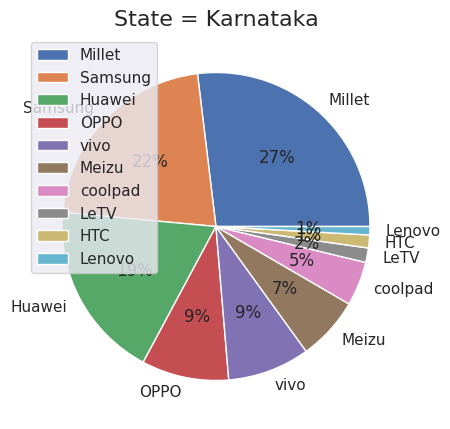

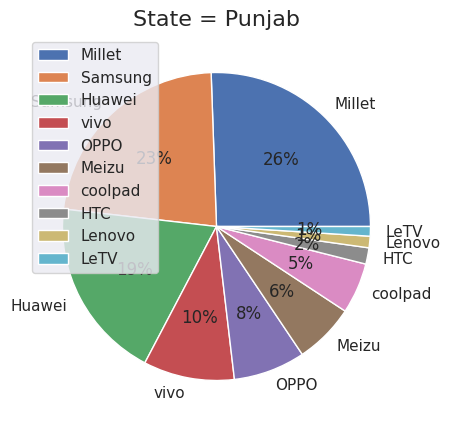

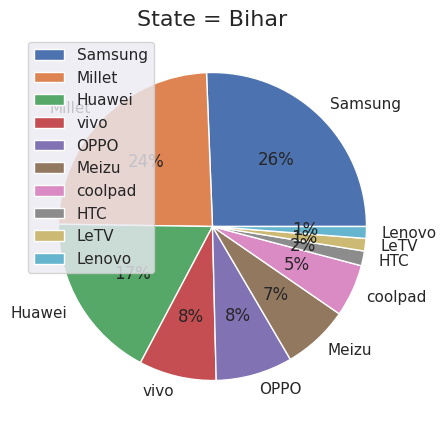

In [125]:
#fig, axes = plt.subplots(3, 2,  figsize=(25,20))
#fig.suptitle("Distribution of MobileBrands by State Pie", **MyTitlefont)
count = 1

for i in Statelist:
    plt.figure(figsize=[10,5])
    #plt.subplot(3,2,count)
    T1 = pd_events_data_user_TopMobile[pd_events_data_user_TopMobile["state"]== i].eng_phone_brand.value_counts()
    plt.pie(T1,labels = T1.index, autopct='%.0f%%')
    str3 = "State = " + i
    plt.title(str3,**MySubTitlefont)
    plt.legend()
    count = count + 1

plt.show()

In [126]:
pd_events_data_user_TopMobile[pd_events_data_user_TopMobile["eng_phone_brand"] == "Huawei"].eng_device_model.value_counts()

Honor 6          299
Honor Play 4X    289
Honor 3C         261
Mate 7           246
Honor 6 Plus     181
                ... 
S8-303L            1
G615-U10           1
Ascend G330C       1
P9                 1
Y610-U00           1
Name: eng_device_model, Length: 120, dtype: int64

---
<a name = Section8.6></a>
# **8.6 Distribution of gender for each state, age segment and phone brand**

In [127]:
pd_events_data_user_TopMobile.pivot_table("device_id",index = ["gender","state","NewGroup"], columns = ["eng_phone_brand"], aggfunc = "count", fill_value =0 , margins = True)

eng_phone_brand                      HTC  Huawei  LeTV  Lenovo  Meizu  Millet  \
gender state      NewGroup                                                      
F      Bihar      MiddleAge (30-59)    4      33     6       3     13      48   
                  SeniorCtzn (>60)     1       3     0       0      0       2   
                  Teenage (1-19)       0       0     0       0      0       6   
                  Youth (20-29)        4      43     2       1     19      60   
       Gujarat    MiddleAge (30-59)    7      45     3       5     10      61   
                  SeniorCtzn (>60)     0       4     0       0      0       2   
                  Teenage (1-19)       0       2     0       0      2       5   
                  Youth (20-29)        4      55     6       3     16      78   
       Karnataka  MiddleAge (30-59)   12     206    18       9     60     268   
                  SeniorCtzn (>60)     1      14     1       0      2      17   
                  Teenage (1-19)       1      10     1       3      8      12   
                  Youth (20-29)       16     192    14       7     63     284   
       Kerala     MiddleAge (30-59)    3      13     1       0     10      43   
                  SeniorCtzn (>60)     0       1     0       0      0       4   
                  Teenage (1-19)       0       0     0       0      0       5   
                  Youth (20-29)        3      41     1       1      7      37   
       Punjab     MiddleAge (30-59)    1      23     5       3     11      35   
                  SeniorCtzn (>60)     0       2     0       0      0       1   
                  Teenage (1-19)       0       2     1       0      1       3   
                  Youth (20-29)        4      28     0       1      4      44   
       WestBengal MiddleAge (30-59)   15     220    13       8     60     319   
                  SeniorCtzn (>60)     0      10     0       1      2      19   
                  Teenage (1-19)       1      13     1       2      6      22   
                  Youth (20-29)       12     209    13       7     92     349   
M      Bihar      MiddleAge (30-59)    7      74     5       5     19      76   
                  SeniorCtzn (>60)     0       2     0       0      1       4   
                  Teenage (1-19)       0       5     0       1      2      13   
                  Youth (20-29)        4      66     4       6     36     103   
       Gujarat    MiddleAge (30-59)    9      65     6       3     28     120   
                  SeniorCtzn (>60)     1       2     0       0      0       7   
                  Teenage (1-19)       2       4     1       0      2      23   
                  Youth (20-29)        8      90     6      11     44     151   
       Karnataka  MiddleAge (30-59)   21     374    28      17     90     484   
                  SeniorCtzn (>60)     2      21     1       2      2      17   
                  Teenage (1-19)       1      21     2       2     15      54   
                  Youth (20-29)       29     306    28      14    168     516   
       Kerala     MiddleAge (30-59)    4      53     1       4      8      53   
                  SeniorCtzn (>60)     0       2     0       0      1       2   
                  Teenage (1-19)       0       5     0       0      2      10   
                  Youth (20-29)        5      42     0       2     21      71   
       Punjab     MiddleAge (30-59)    6      64     2       4     19      83   
                  SeniorCtzn (>60)     0       1     0       0      0       2   
                  Teenage (1-19)       0       8     0       0      2      10   
                  Youth (20-29)        6      62     2       4     26      76   
       WestBengal MiddleAge (30-59)   29     489    19      38    128     579   
                  SeniorCtzn (>60)     1      10     0       0      3      19   
                  Teenage (1-19)       5      34     1       0     27      52   
                  Youth (20-29)

---
<a name = Section8.7></a>
# **8.7 Distribution of age segment for each state, gender and phone brand**

In [128]:
pd_events_data_user_TopMobile.pivot_table("device_id",index = ["NewGroup","gender","state",], columns = ["eng_phone_brand"], aggfunc = "count", fill_value =0 , margins = True)

eng_phone_brand                      HTC  Huawei  LeTV  Lenovo  Meizu  Millet  \
NewGroup          gender state                                                  
MiddleAge (30-59) F      Bihar         4      33     6       3     13      48   
                         Gujarat       7      45     3       5     10      61   
                         Karnataka    12     206    18       9     60     268   
                         Kerala        3      13     1       0     10      43   
                         Punjab        1      23     5       3     11      35   
                         WestBengal   15     220    13       8     60     319   
                  M      Bihar         7      74     5       5     19      76   
                         Gujarat       9      65     6       3     28     120   
                         Karnataka    21     374    28      17     90     484   
                         Kerala        4      53     1       4      8      53   
                         Punjab        6      64     2       4     19      83   
                         WestBengal   29     489    19      38    128     579   
SeniorCtzn (>60)  F      Bihar         1       3     0       0      0       2   
                         Gujarat       0       4     0       0      0       2   
                         Karnataka     1      14     1       0      2      17   
                         Kerala        0       1     0       0      0       4   
                         Punjab        0       2     0       0      0       1   
                         WestBengal    0      10     0       1      2      19   
                  M      Bihar         0       2     0       0      1       4   
                         Gujarat       1       2     0       0      0       7   
                         Karnataka     2      21     1       2      2      17   
                         Kerala        0       2     0       0      1       2   
                         Punjab        0       1     0       0      0       2   
                         WestBengal    1      10     0       0      3      19   
Teenage (1-19)    F      Bihar         0       0     0       0      0       6   
                         Gujarat       0       2     0       0      2       5   
                         Karnataka     1      10     1       3      8      12   
                         Kerala        0       0     0       0      0       5   
                         Punjab        0       2     1       0      1       3   
                         WestBengal    1      13     1       2      6      22   
                  M      Bihar         0       5     0       1      2      13   
                         Gujarat       2       4     1       0      2      23   
                         Karnataka     1      21     2       2     15      54   
                         Kerala        0       5     0       0      2      10   
                         Punjab        0       8     0       0      2      10   
                         WestBengal    5      34     1       0     27      52   
Youth (20-29)     F      Bihar         4      43     2       1     19      60   
                         Gujarat       4      55     6       3     16      78   
                         Karnataka    16     192    14       7     63     284   
                         Kerala        3      41     1       1      7      37   
                         Punjab        4      28     0       1      4      44   
                         WestBengal   12     209    13       7     92     349   
                  M      Bihar         4      66     4       6     36     103   
                         Gujarat       8      90     6      11     44     151   
                         Karnataka    29     306    28      14    168     516   
                         Kerala        5      42     0       2     21      71   
                         Punjab        6      62     2       4     26      76   
                         WestBe

In [129]:
sns.set(rc={'figure.figsize':(20,5)})
MyTitlefont      = {"fontname" :"Times New Roman", "fontsize":20}
MySubTitlefont2  = {"fontname" :"Times New Roman", "fontsize":18}
MySubTitlefont   = {"fontname" :"Times New Roman", "fontsize":16}
MyAxisTitlefont  = {"fontname" :"Times New Roman", "fontsize":12}
MyLabelfont      = {"fontname" :"Times New Roman", "fontsize":12}

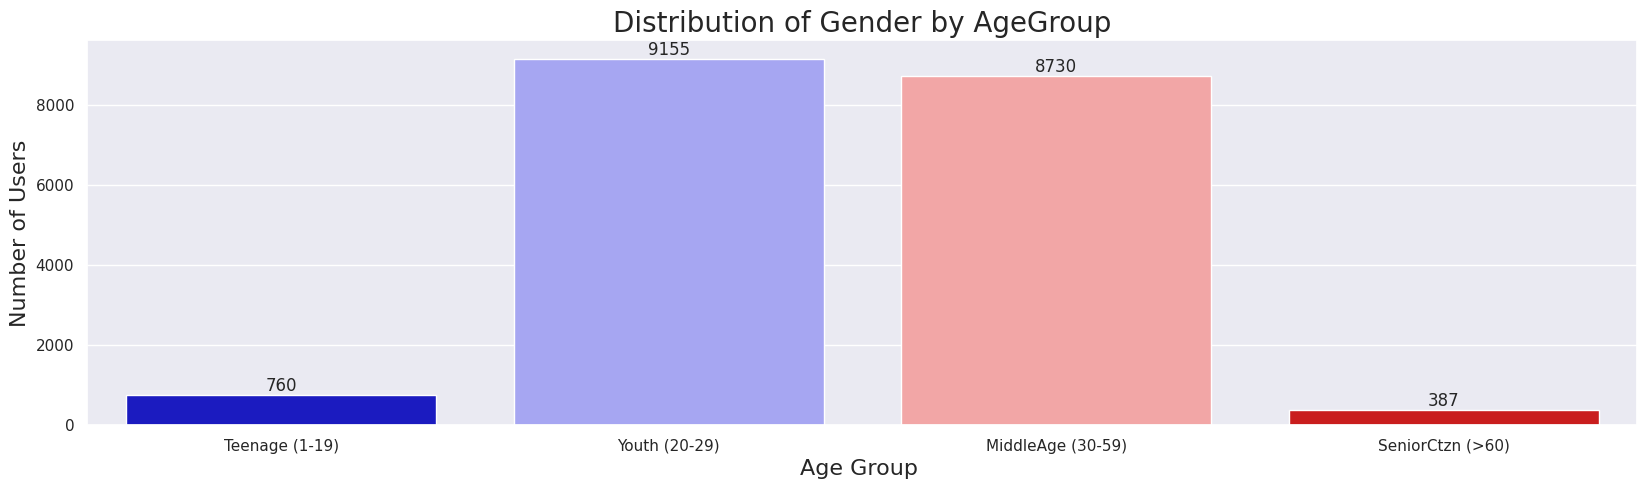

In [130]:
ax = sns.countplot(data= pd_events_data_user,
                   x = 'NewGroup',
                   #hue = "gender",
                   order = ["Teenage (1-19)", "Youth (20-29)" , "MiddleAge (30-59)", "SeniorCtzn (>60)"],
                   palette= "seismic")

#cavas = plt.figure(figsize=[20,10])


for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

#plt.xticks(rotation = 30)
ax.set_title('Distribution of Gender by AgeGroup',**MyTitlefont)
ax.set_xlabel('Age Group ',**MySubTitlefont)
ax.set_ylabel('Number of Users',**MySubTitlefont)


plt.show()

---
<a name = Section8.8></a>
# **8.8 Hourly distribution of phone calls**

In [131]:
pd_events_data_Select_States.shape

(422971, 7)

In [132]:
pd_events_data_Select_States["Hour"] = pd.DatetimeIndex(pd_events_data_Select_States["timestamp"]).hour

In [133]:
pd_events_data_Select_States.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422971 entries, 1 to 3252921
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   422971 non-null  int64  
 1   device_id  422971 non-null  float64
 2   timestamp  422971 non-null  object 
 3   longitude  422971 non-null  float64
 4   latitude   422971 non-null  float64
 5   city       422971 non-null  object 
 6   state      422971 non-null  object 
 7   Hour       422971 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 29.0+ MB


In [134]:
pd_events_data_Select_States.groupby("Hour")["event_id"].aggregate("count")

Hour
0     14493
1      7760
2      5619
3      4837
4      4546
5      7404
6     14366
7     19258
8     21719
9     21983
10    24395
11    22132
12    21443
13    20289
14    19500
15    19108
16    19226
17    19786
18    20050
19    22221
20    23879
21    26088
22    23962
23    18907
Name: event_id, dtype: int64

In [135]:
pd_events_data_Select_States["TimeofDay"] =""
pd_events_data_Select_States["TimeofDay"][(pd_events_data_Select_States["Hour"]>=0)  & (pd_events_data_Select_States["Hour"]<=5)]  = "Night"
pd_events_data_Select_States["TimeofDay"][(pd_events_data_Select_States["Hour"]>=6)  & (pd_events_data_Select_States["Hour"]<=11)] = "Morning"
pd_events_data_Select_States["TimeofDay"][(pd_events_data_Select_States["Hour"]>=12) & (pd_events_data_Select_States["Hour"]<=17)] = "Afternoon"
pd_events_data_Select_States["TimeofDay"][(pd_events_data_Select_States["Hour"]>=18) & (pd_events_data_Select_States["Hour"]<=23)] = "Evening"

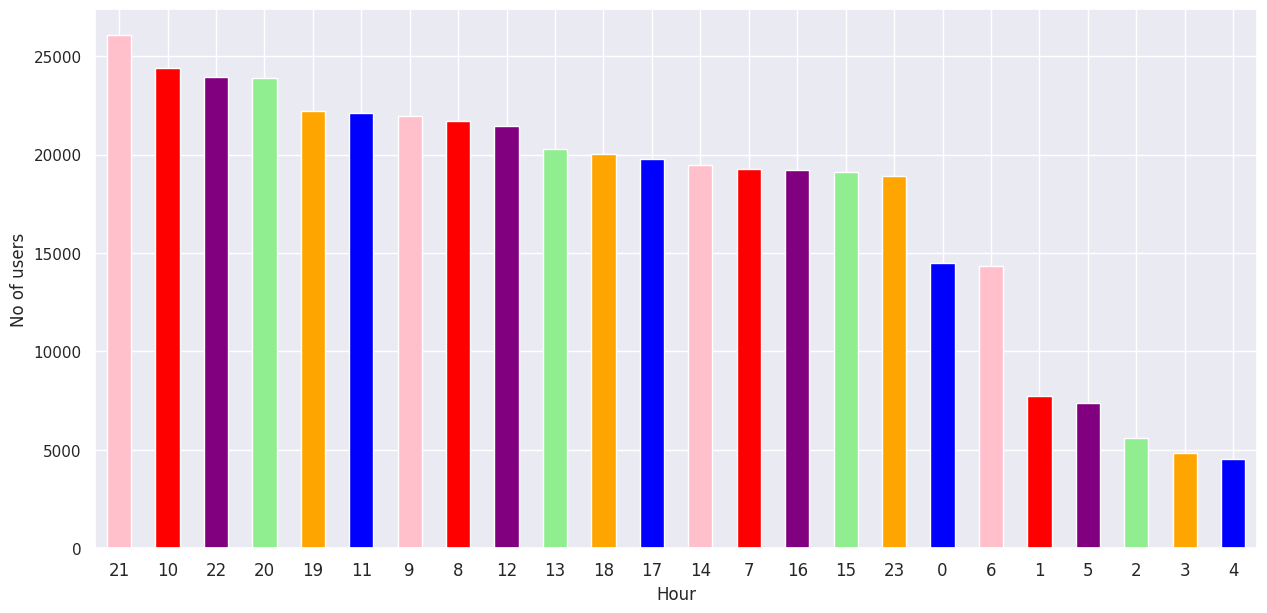

In [136]:
cavas = plt.figure(figsize=[15,7])
pd_events_data_Select_States['Hour'].value_counts().plot.bar(color = Colors)
plt.xlabel('Hour')
plt.ylabel('No of users')
plt.xticks(size=12, rotation = 0)
plt.show()

In [137]:
sns.set(rc={'figure.figsize':(15,6)})
MyTitlefont      = {"fontname" :"Times New Roman", "fontsize":20}
MySubTitlefont2  = {"fontname" :"Times New Roman", "fontsize":18}
MySubTitlefont   = {"fontname" :"Times New Roman", "fontsize":16}
MyAxisTitlefont  = {"fontname" :"Times New Roman", "fontsize":12}
MyLabelfont      = {"fontname" :"Times New Roman", "fontsize":12}

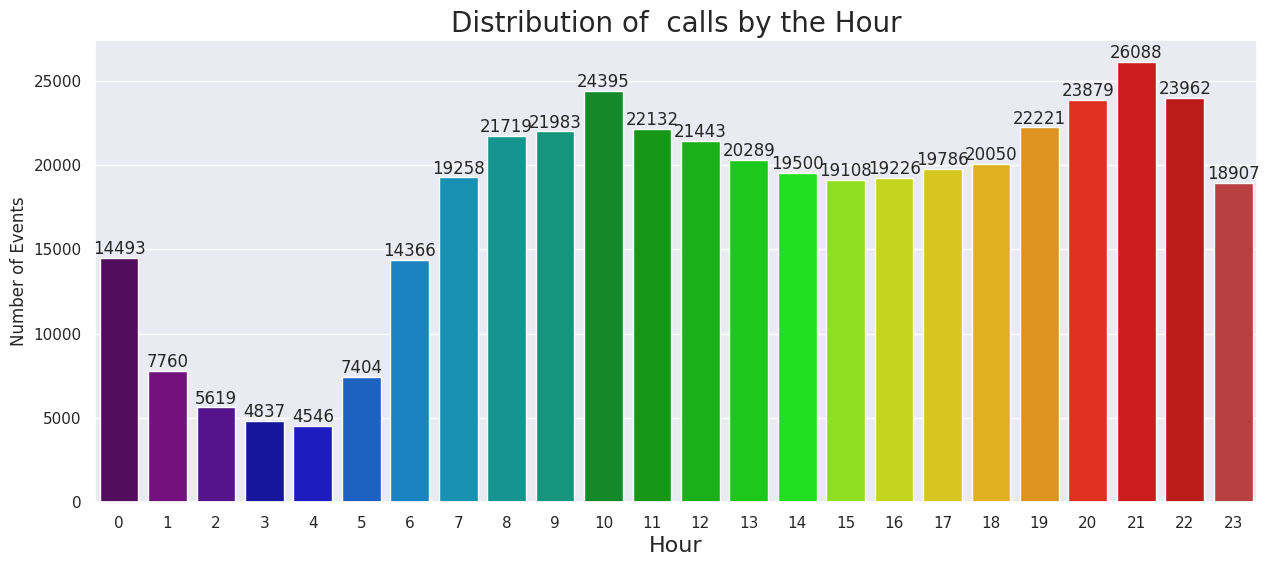

In [138]:
ax = sns.countplot(data= pd_events_data_Select_States, x = 'Hour' ,
                   palette = "nipy_spectral"
                  )

#cavas = plt.MySubTitlefontfigure(figsize=[20,10])

for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

ax.set_title('Distribution of  calls by the Hour',**MyTitlefont)
ax.set_xlabel('Hour',**MySubTitlefont)
ax.set_ylabel('Number of Events',**MyAxisTitlefont)


plt.show()

In [139]:
sns.set(rc={'figure.figsize':(15,5)})
MyTitlefont      = {"fontname" :"Times New Roman", "fontsize":20}
MySubTitlefont2  = {"fontname" :"Times New Roman", "fontsize":18}
MySubTitlefont   = {"fontname" :"Times New Roman", "fontsize":16}
MyAxisTitlefont  = {"fontname" :"Times New Roman", "fontsize":12}
MyLabelfont      = {"fontname" :"Times New Roman", "fontsize":12}

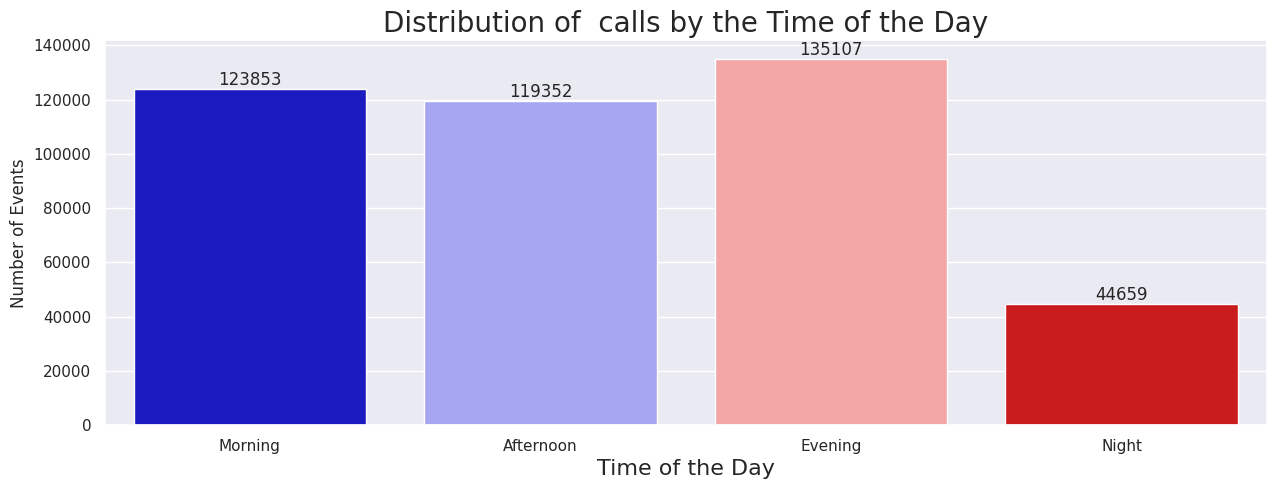

In [140]:
ax = sns.countplot(data= pd_events_data_Select_States, x = 'TimeofDay' ,
                   order =["Morning","Afternoon","Evening","Night"],
                   #hue ="TimeofDay",
                   palette = "seismic")

#plt.figure(figsize=[5,5])

for label in ax.containers:
    ax.bar_label(label)

ax.set_title('Distribution of  calls by the Time of the Day',**MyTitlefont)
ax.set_xlabel('Time of the Day',**MySubTitlefont)
ax.set_ylabel('Number of Events',**MyAxisTitlefont)


plt.show()

# 8.9  Plot the Users on the Map using any suitable package.

In [141]:
Statelist

array(['WestBengal', 'Gujarat', 'Kerala', 'Karnataka', 'Punjab', 'Bihar'],
      dtype=object)

In [142]:

m_india = folium.Map(location=[23.5 , 75.3],zoom_start=8,tiles='cartodbpositron' )
folium.GeoJson("https://raw.githubusercontent.com/nagasudhirpulla/taming_python/master/blog/skills/assets/data/states_india.geojson",name="B", style_function=lambda x:borderstyle).add_to(m_india)

for S in Statelist:
    print("Handling Data for State", S)
    Name = "AccredianUsers_"
    count =0
    Nans =0

    # Copy data of the State only to this Temporary Dataframe.
    pd_events_data_w = pd_events_data_user [pd_events_data_user["state"] == S].copy()

    #pd_events_data_w.drop(["event_id","device_id","timestamp"],axis=1,inplace=True)
    #pd_events_data_w.drop_duplicates(inplace = True)

    LtMean = pd_events_data_w.latitude.median()
    LgMean = pd_events_data_w.longitude.median()


    # Draw Map
    m_state = folium.Map(location=[LtMean , LgMean ],zoom_start=8,tiles='cartodbpositron' )

    borderstyle = { "color":"black", "weight":1, "fill":False}
    folium.GeoJson("https://raw.githubusercontent.com/nagasudhirpulla/taming_python/master/blog/skills/assets/data/states_india.geojson",name="B", style_function=lambda x:borderstyle).add_to(m_state)

    # Pick each user in the list by Latitude and Longitude
    for i in range(len(pd_events_data_w)):
        count = count + 1
        a = pd_events_data_w.iloc[i].latitude
        b = pd_events_data_w.iloc[i].longitude

        if(pd.isna(pd_events_data_w.iloc[i].state) == True):
            Ccol="white"
        else:
            Ccol = stateColor[pd_events_data_w.iloc[i].state]

        if((pd.isna(a) == False)):
            Nans = Nans+1
            folium.Circle(location=[a,b],radius =1000,color=Ccol, weight = 1 ,  fill_opacity =0.7).add_to(m_india)
            folium.Circle(location=[a,b],radius =1000,color=Ccol, weight = 1 ,  fill_opacity =0.7).add_to(m_state)
            #folium.Marker(location=[a,b], tooltip=pd_events_data_all.iloc[i].city, icon=folium.Icon(color=Ccol, icon="star")).add_to(m_india)

    print( "For the state ", S , "Total Users = ",count)
    Name = Name + S +(".html")
    m_state.save(Name)

#print("End of For Loop")
m_india.save("AccredianAllIndiaUsers.html")

Handling Data for State WestBengal
For the state  WestBengal Total Users =  7436
Handling Data for State Gujarat
For the state  Gujarat Total Users =  1749
Handling Data for State Kerala
For the state  Kerala Total Users =  939
Handling Data for State Karnataka
For the state  Karnataka Total Users =  6481
Handling Data for State Punjab
For the state  Punjab Total Users =  1055
Handling Data for State Bihar
For the state  Bihar Total Users =  1372


# 8.10 : Distribution based on Type of User.

In [143]:
sns.set(rc={'figure.figsize':(20,5)})
MyTitlefont      = {"fontname" :"Times New Roman", "fontsize":20}
MySubTitlefont2  = {"fontname" :"Times New Roman", "fontsize":18}
MySubTitlefont   = {"fontname" :"Times New Roman", "fontsize":16}
MyAxisTitlefont  = {"fontname" :"Times New Roman", "fontsize":12}
MyLabelfont      = {"fontname" :"Times New Roman", "fontsize":12}

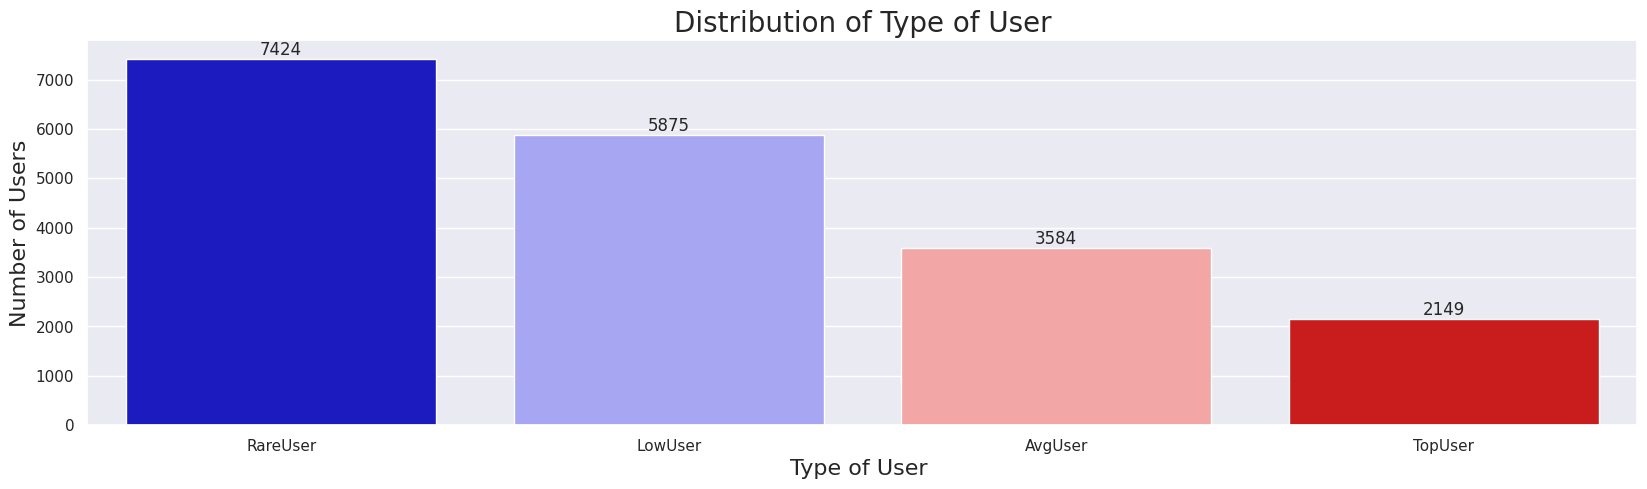

In [144]:
ax = sns.countplot(data= pd_events_data_user,
                   x = 'UserType',
                   #hue = "gender",
                   #order = ["Teenage (1-19)", "Youth (20-29)" , "MiddleAge (30-59)", "SeniorCtzn (>60)"],
                   order=  ["RareUser","LowUser","AvgUser","TopUser"],
                  palette= "seismic")

#cavas = plt.figure(figsize=[20,10])


for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

#plt.xticks(rotation = 30)
ax.set_title('Distribution of Type of User',**MyTitlefont)
ax.set_xlabel('Type of User ',**MySubTitlefont)
ax.set_ylabel('Number of Users',**MySubTitlefont)

plt.show()

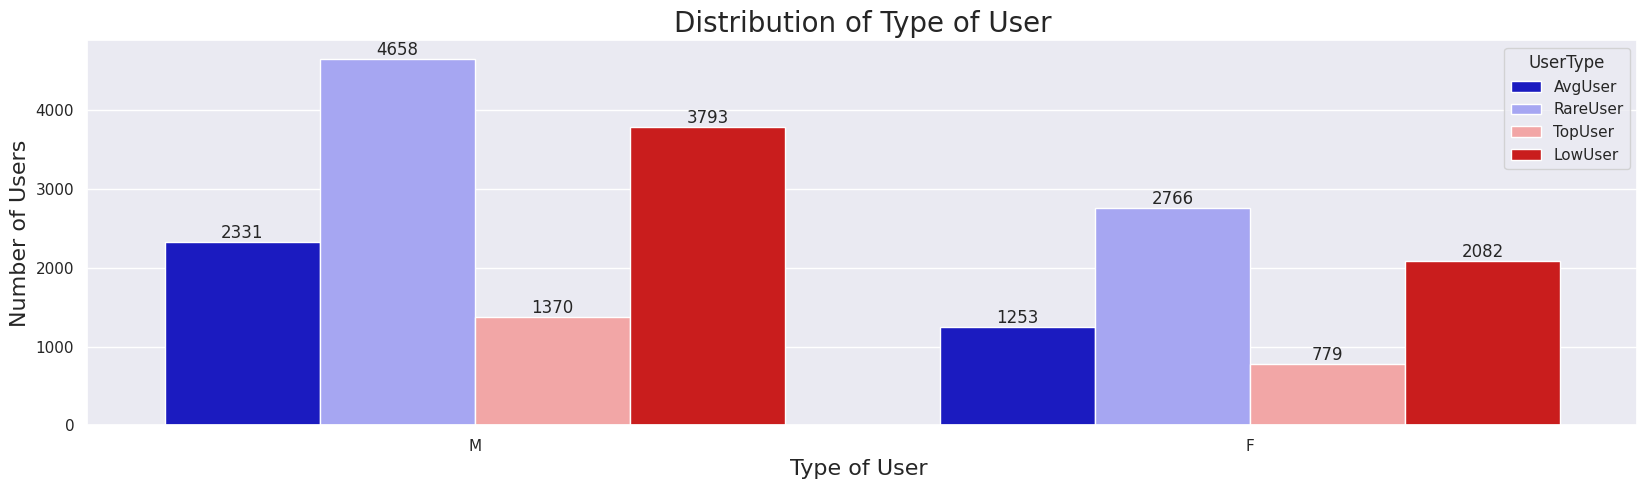

In [145]:
ax = sns.countplot(data= pd_events_data_user,
                   x = 'gender',
                   hue = "UserType",
                   #order = ["Teenage (1-19)", "Youth (20-29)" , "MiddleAge (30-59)", "SeniorCtzn (>60)"],
                   #order=  ["RareUser","LowUser","AvgUser","TopUser"],
                  palette= "seismic")

#cavas = plt.figure(figsize=[20,10])


for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

#plt.xticks(rotation = 30)
ax.set_title('Distribution of Type of User',**MyTitlefont)
ax.set_xlabel('Type of User ',**MySubTitlefont)
ax.set_ylabel('Number of Users',**MySubTitlefont)

plt.show()

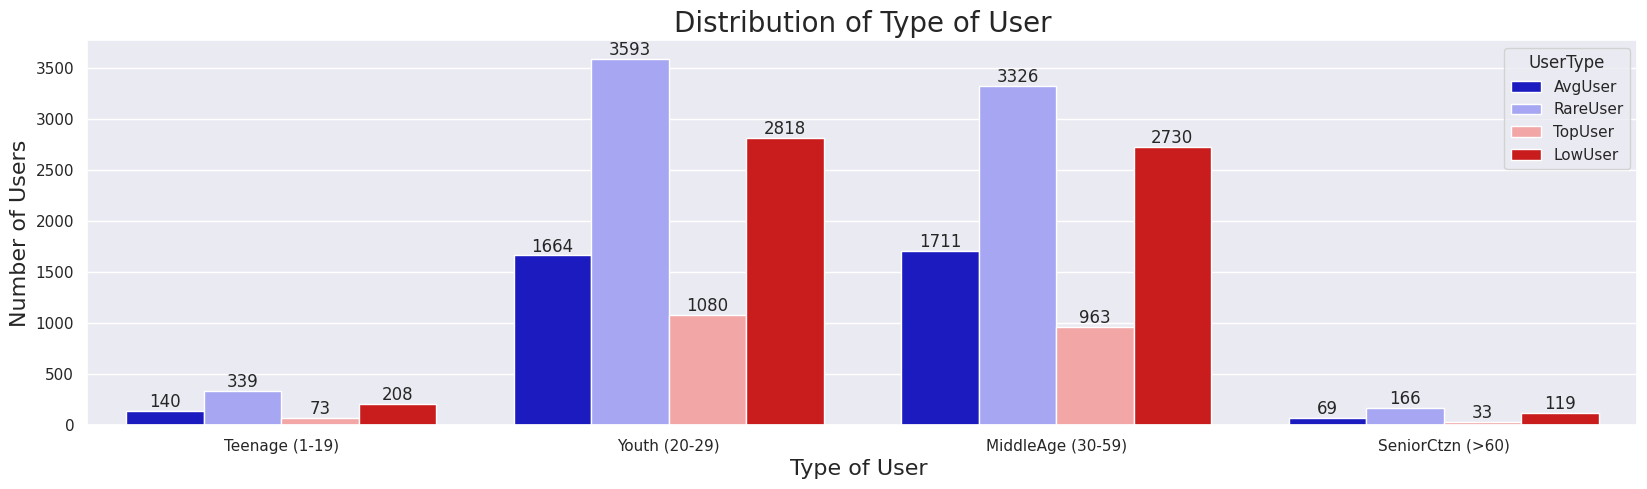

In [146]:
ax = sns.countplot(data= pd_events_data_user,
                   x = 'NewGroup',
                   hue = "UserType",
                   order = ["Teenage (1-19)", "Youth (20-29)" , "MiddleAge (30-59)", "SeniorCtzn (>60)"],
                   #order=  ["RareUser","LowUser","AvgUser","TopUser"],
                  palette= "seismic")

#cavas = plt.figure(figsize=[20,10])


for label in ax.containers:
    ax.bar_label(label,**MyLabelfont)

#plt.xticks(rotation = 30)
ax.set_title('Distribution of Type of User',**MyTitlefont)
ax.set_xlabel('Type of User ',**MySubTitlefont)
ax.set_ylabel('Number of Users',**MySubTitlefont)

plt.show()

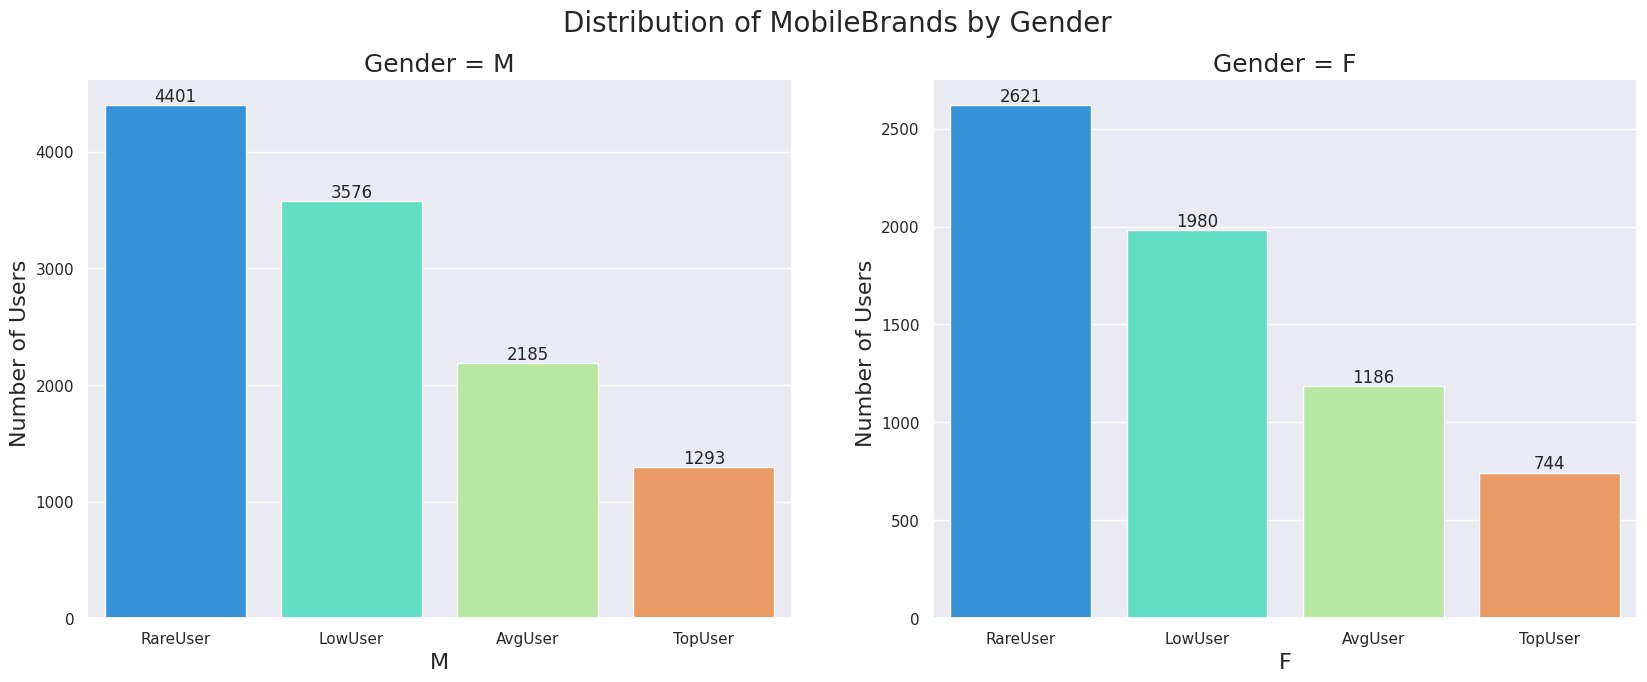

In [147]:
fig, axes = plt.subplots(1, 2,  figsize=(20,7))
fig.suptitle("Distribution of MobileBrands by Gender", **MyTitlefont)
for i in enumerate(pd_events_data_user_TopMobile["gender"].unique()):

    plt.subplot(1,2,i[0]+1)
    ax = sns.countplot(data=pd_events_data_user_TopMobile[pd_events_data_user_TopMobile["gender"]== i[1]],
                   x ="UserType",
                   #x ="NewGroup",
                   order=  ["RareUser","LowUser","AvgUser","TopUser"],
                   #order=  pd_events_data_user_TopMobile["UserType"].value_counts(ascending=False).index,
                  palette= "rainbow")
    for label in ax.containers:
        ax.bar_label(label,**MyLabelfont)

    str1 = "Gender = " + i[1]
    ax.set_title(str1,**MySubTitlefont2)
    ax.set_xlabel(i[1],**MySubTitlefont)
    ax.set_ylabel('Number of Users ',**MySubTitlefont)

# 9.0 Summary

Operations

Mobile Network Availability must be at its peak in the evening from 6pm to 10pm. Accredian must ensure no outage of Network during this duration.
Mobile downtime - Any downtime for maintainance be carried out between 1am to 6am in the night, when the usage is very low.

Products
Usage of Mobile Phones is high in the Youth and Mid age category (Mostly 20 to 40 Age group). These population are mostly in jobs and well earning.
They are also a large number of users. The Products prepared must be catering to their age group.

Marketing
While most of the country has higher Males using than Female.
Kerala has better ratio of females using the phones than males.
There is a huge potential to increase the usage of phones among female category.
Hence the products must be marketed and advertised to Female category and increase their utlisation.

Alliances
Millet is the preffered brand among all the customers across age groups. Accredian Telecom must give preference to have alliances with Millet and Samsung and look to co-brand the products.  